# Домашнее задание №1: Обработка и анализ изображений
# по дисциплине: «Анализ изображений и CV»

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

Выполнил:  
**Вольхин Данил Федорович**

Email:  
[dfvolkhin@edu.hse.ru](mailto:dfvolkhin@edu.hse.ru)

Дата:  
**4 февраля 2025**

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

😊 Первый раз в жизни делаю посадку на юпитер 😊

## ANSI коды для цветов текста

In [1]:
RED = "\033[31m"
GREEN = "\033[32m"
YELLOW = "\033[33m"
BLUE = "\033[34m"
RESET = "\033[0m"  # сброс цветов до стандартных

## Шаблоны markdown

<span style="color: green;"># Это комментарий в коде</span><br>
<span style="color: blue;">def</span> greet(name):<br>
<span style="color: red;">print</span>(f"Hello, {name}!")
<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">
<pre style="background-color: #F5F5F5; padding: 10px; border-radius: 5px; font-family: monospace;">code</pre>

## Установка библиотек (Мусорка)

In [2]:
# !pip install torch==1.12.1+cu116 torchvision==0.13.1+cu116 --index-url https://download.pytorch.org/whl/cu116
# !pip install tensorboard==2.10.1 tensorflow==2.10.0
# !pip install pydantic==2.10.3
# !pip install tqdm==4.66.2
# !pip install scikit-learn==1.5.1
# !pip install scipy==1.13.1
# !pip install seaborn==0.13.2
# !pip install rich==13.7.1
# !pip install requests==2.32.3
# !pip install pillow==10.4.0
# !pip install pandas==2.2.2
# !pip install matplotlib==3.9.2
# !pip install duckdb==1.1.0
# !pip install annotated-types==0.7.0
# !pip install scikit-image

# Подготовка к написанию кода

## Импорт библиотек

In [3]:
print(f"{YELLOW}"+60*"-"+f"{RESET}")
print(f"Библиотеки: \n")

# Дополнительные библиотеки
import platform # Узнать версию пайтона ;)
import os
import logging
import time
import sys
import random
import re
import shutil
from tqdm import tqdm
from functools import wraps
from typing import Any, Tuple, Union, Optional, List, Type, Callable, Dict
from collections import Counter
import zipfile
from dataclasses import dataclass
import requests
import io
from io import BytesIO
import base64
import tempfile
from pathlib import Path

# Основные библиотеки
import IPython.display as ipd # Добавляет виджеты для ячеек юпитера
from IPython.display import HTML
from IPython import get_ipython
import ipykernel
print(f"python: {BLUE}{platform.python_version()}{RESET} ")
import matplotlib # Для рисунков
import matplotlib.pyplot as plt
print(f"matplotlib: {BLUE}{matplotlib.__version__}{RESET}")
import numpy as np # Для работы с массивами
print(f"numpy: {BLUE}{np.__version__}{RESET}")
import pandas as pd # Работа с таблицами
print(f"pandas: {BLUE}{pd.__version__}{RESET}")
import sklearn # Много полезного для ML
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.feature_extraction.image import extract_patches_2d
print(f"sklearn: {BLUE}{sklearn.__version__}{RESET}")
import scipy
print(f"scipy: {BLUE}{scipy.__version__}{RESET}")
import pydantic # Для валидации данных
from pydantic import (BaseModel, Field, StrictStr, condecimal, StrictInt, StrictBool,
                      FilePath, DirectoryPath, ValidationError, root_validator, ConfigDict)
print(f"pydantic: {BLUE}{pydantic.__version__}{RESET}")
import fastapi
from fastapi import HTTPException, status
print(f"fastapi: {BLUE}{fastapi.__version__}{RESET}")
import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.optim.lr_scheduler import ReduceLROnPlateau
from torch.utils.data import DataLoader, Subset, WeightedRandomSampler
print(f"torch: {BLUE}{torch.__version__}{RESET}")
import torchvision
from torchvision import datasets
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
import torchvision.models as models
print(f"torchvision: {BLUE}{torchvision.__version__}{RESET}")
import requests
print(f"requests: {BLUE}{requests.__version__}{RESET}")
import PIL
from PIL import Image, ImageEnhance
print(f"pillow: {BLUE}{PIL.__version__}{RESET}")
import cv2
print(f"openCV: {BLUE}{cv2.__version__}{RESET}")
import skimage
from skimage.feature import local_binary_pattern
from skimage.feature.texture import graycomatrix, graycoprops
from skimage.segmentation import felzenszwalb, slic
from skimage.util import view_as_blocks
from skimage.morphology import opening, closing
from skimage.metrics import peak_signal_noise_ratio as psnr
from skimage.metrics import structural_similarity as ssim
print(f"skimage: {BLUE}{skimage.__version__}{RESET}")
import pytesseract
print(f"pytesseract: {BLUE}{pytesseract.__version__}{RESET}")

from kneed import KneeLocator

from rich.theme import Theme
from rich.logging import RichHandler
from rich.console import Console
from rich.pretty import install as pretty_install
from rich.traceback import install as traceback_install


print(f"{YELLOW}"+60*"-"+f"{RESET}")

------------------------------------------------------------
Библиотеки: 

python: 3.9.16 
matplotlib: 3.9.2
numpy: 1.26.4
pandas: 2.2.2
sklearn: 1.5.1
scipy: 1.13.1
pydantic: 2.10.3
fastapi: 0.115.7
torch: 2.6.0+cu118
torchvision: 0.21.0+cu118
requests: 2.32.3
pillow: 10.4.0
openCV: 4.10.0
skimage: 0.24.0
pytesseract: 0.3.13
------------------------------------------------------------


## Дополнительные настройки

In [4]:
import warnings
warnings.filterwarnings("ignore")
import logging
# Отключение логирования для cmdstanpy
logging.getLogger('cmdstanpy').setLevel(logging.ERROR)
# Полезна при разработке собственных библиотек, юпитер будет переимпортировать модули, если в них были изменения
%load_ext autoreload
%autoreload 1

## Кастомный setup_logging

In [5]:
log = None

def setup_logging(clean=False, debug=False):
    global log

    if log is not None:
        return log

    try:
        if clean and os.path.isfile('setup.log'):
            os.remove('setup.log')
        time.sleep(0.1)  # prevent race condition
    except:
        pass

    if sys.version_info >= (3, 9):
        logging.basicConfig(level=logging.DEBUG, format='%(asctime)s | %(levelname)s | %(pathname)s | %(message)s',
                            filename='setup.log', filemode='a', encoding='utf-8', force=True)
    else:
        logging.basicConfig(level=logging.DEBUG, format='%(asctime)s | %(levelname)s | %(pathname)s | %(message)s',
                            filename='setup.log', filemode='a', force=True)

    console = Console(log_time=True, log_time_format='%H:%M:%S-%f', theme=Theme({
        "traceback.border": "black",
        "traceback.border.syntax_error": "black",
        "inspect.value.border": "black",
    }))
    pretty_install(console=console)
    traceback_install(console=console, extra_lines=1, width=console.width, word_wrap=False, indent_guides=False,
                      suppress=[])
    rh = RichHandler(show_time=True, omit_repeated_times=False, show_level=True, show_path=False, markup=False,
                     rich_tracebacks=True, log_time_format='%H:%M:%S-%f',
                     level=logging.DEBUG if debug else logging.INFO, console=console)
    rh.set_name(logging.DEBUG if debug else logging.INFO)
    log = logging.getLogger("sd")
    log.addHandler(rh)

    return log

In [6]:
log = setup_logging()

## Валидация входящих данных для каждого класса

### validate_with_pydantic

In [7]:
def validate_with_pydantic(model_cls):
    """
    Декоратор для валидации данных с использованием Pydantic-модели.
    """

    def decorator(func):
        @wraps(func)
        def wrapper(*args, **kwargs):
            # Проверяем данные в аргументах функции
            try:
                data = kwargs.get("entry", args[0] if args else None)
                if not data:
                    raise HTTPException(status_code=status.HTTP_400_BAD_REQUEST,
                                        detail="No data provided for validation.")
                # Валидация данных
                if isinstance(data, BaseModel):
                    data = data.dict(by_alias=True)
                validated_data = model_cls(**data)
                # Передаем валидированные данные дальше
                kwargs["entry"] = validated_data
                return func(*args, **kwargs)
            except ValidationError as ve:
                log.exception("Validation failed", exc_info=ve)
                raise HTTPException(status_code=status.HTTP_400_BAD_REQUEST,
                                    detail="Invalid data for Pydantic model.") from ve

        return wrapper

    return decorator

### auto_generate_docstring

In [8]:
def auto_generate_docstring(cls: Type[BaseModel]) -> Type[BaseModel]:
    """
    Декоратор для автоматического добавления docstring в классы Pydantic.
    """

    def generate_docstring(model: Type[BaseModel]) -> str:
        """
        Генерация строки документации из описания полей модели Pydantic.
        """
        docstring = []
        for field_name, field_info in model.__fields__.items():
            field_details = f"Field '{field_name}':\n"
            if field_info.description:  # Получение описания
                field_details += f"  Description: {field_info.description}\n"
            if field_info.examples:  # Получение примеров
                field_details += f"  Examples: {field_info.examples}\n"
            docstring.append(field_details)
        return "\n".join(docstring)

    # Добавляем описание к существующему docstring
    cls.__doc__ = (cls.__doc__ or "") + "\n\n" + generate_docstring(cls)
    return cls

# Функции определенные на Семинаре 1

## Функция для сохранения изображения в папку

In [9]:
def download_image(url: str, folder_name: str, filename: str = "image.jpg"):
    os.makedirs(folder_name, exist_ok=True)
    response = requests.get(url, stream=True)
    if response.status_code == 200:
        image_path = os.path.join(folder_name, filename)
        with open(image_path, 'wb') as file:
            for chunk in response.iter_content(1024):
                file.write(chunk)
        log.info(f"Изображение сохранено: {image_path}")
    else:
        log.error(f"Ошибка загрузки изображения, статус: {response.status_code}")

## Функция для загрузки и отображения с помощью OpenCV | PIL

In [10]:
def imgop(path_to_img, lib: str = "cv2", show: bool = False, show_jupyter: bool = False, fixed_size: tuple = (300, 300), grayscale: bool = False):
    liblist = ["cv2", "PIL"]
    
    assert lib in liblist, f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}"
    
    if not os.path.exists(path_to_img):
        log.error("Проверьте, что изображение существует")
        return None
    
    try:
        if lib == "cv2":
            flag = cv2.IMREAD_GRAYSCALE if grayscale else cv2.IMREAD_COLOR
            img = cv2.imread(path_to_img, flag)
            if img is None:
                raise ValueError("Не удалось загрузить изображение с помощью OpenCV.")
            if show:
                cv2.imshow("Image", img)
                cv2.waitKey(0)
                cv2.destroyAllWindows()
            if show_jupyter:
                if grayscale:
                    ipd.display(HTML(f'<img src="{path_to_img}" width="{fixed_size[0]}" height="{fixed_size[1]}" style="filter: grayscale(100%);">'))
                else:
                    ipd.display(HTML(f'<img src="{path_to_img}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))
        elif lib == "PIL":
            img = Image.open(path_to_img)
            if grayscale:
                img = img.convert("L")
            if show:
                img.show()
            if show_jupyter:
                if grayscale:
                    ipd.display(HTML(f'<img src="{path_to_img}" width="{fixed_size[0]}" height="{fixed_size[1]}" style="filter: grayscale(100%);">'))
                else:
                    ipd.display(HTML(f'<img src="{path_to_img}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))
        return img
    except Exception as ex:
        log.exception("Ошибка при обработке изображения", exc_info=ex)
        return None

## Функция для разделения изображения на три канала

In [11]:
def splitchenal(
    img: Union[np.ndarray, Image.Image],
    lib: str = "cv2",
    show_jupyter: bool = False,
    save_path: str = "./",
    color_space: str = "RGB",
):

    # Проверка корректности параметров
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    assert color_space in ["RGB", "HSV", "LAB", "GRAY"], log.error("Некорректное цветовое пространство. Доступные варианты: RGB, HSV, LAB, GRAY.")

    # Создание директории для сохранения, если она не существует
    os.makedirs(save_path, exist_ok=True)

    # Преобразование изображения в numpy.ndarray, если это PIL.Image
    if lib == "cv2":
        if isinstance(img, Image.Image):  # Если изображение в формате PIL
            img = np.array(img)  # Преобразуем PIL.Image в numpy.ndarray
            if img.ndim == 3 and img.shape[2] == 4:  # Если изображение RGBA
                img = cv2.cvtColor(img, cv2.COLOR_RGBA2BGR)  # Преобразуем RGBA в BGR
            elif img.ndim == 3 and img.shape[2] == 3:  # Если изображение RGB
                img = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)  # Преобразуем RGB в BGR
        elif isinstance(img, np.ndarray):  # Если изображение уже в формате OpenCV
            if img.ndim == 3 and img.shape[2] == 4:  # Если изображение BGRA
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2BGR)  # Преобразуем BGRA в BGR
    elif lib == "PIL":
        if isinstance(img, np.ndarray):  # Если изображение в формате OpenCV
            if img.ndim == 3 and img.shape[2] == 3:  # Если изображение BGR
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Преобразуем BGR в RGB
                img = Image.fromarray(img)  # Преобразуем numpy.ndarray в PIL.Image
            elif img.ndim == 3 and img.shape[2] == 4:  # Если изображение BGRA
                img = cv2.cvtColor(img, cv2.COLOR_BGRA2RGB)  # Преобразуем BGRA в RGB
                img = Image.fromarray(img)  # Преобразуем numpy.ndarray в PIL.Image
        elif isinstance(img, Image.Image):  # Если изображение уже в формате PIL
            pass  # Оставляем как есть

    # Преобразование изображения в нужное цветовое пространство
    if lib == "cv2":
        if color_space == "HSV":
            img = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        elif color_space == "LAB":
            img = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        elif color_space == "GRAY":
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    elif lib == "PIL":
        if color_space == "HSV":
            img = img.convert("HSV")
        elif color_space == "LAB":
            img = img.convert("LAB")
        elif color_space == "GRAY":
            img = img.convert("L")

    # Разделение каналов
    if color_space == "GRAY":
        channels = {"Gray": img}
    else:
        if lib == "cv2":
            channels_split = cv2.split(img)
        elif lib == "PIL":
            channels_split = img.split()
        channel_names = {
            "RGB": ["Blue", "Green", "Red"],
            "HSV": ["Hue", "Saturation", "Value"],
            "LAB": ["Luminance", "A", "B"],
        }[color_space]
        channels = {name: ch for name, ch in zip(channel_names, channels_split)}

    # Сохранение и отображение каналов
    for color, ch_img in channels.items():
        if lib == "cv2":
            if color_space == "GRAY":
                path = os.path.join(save_path, f"{color}_channel.jpg")
                cv2.imwrite(path, ch_img)
            else:
                zeros = np.zeros_like(ch_img)  # Черный канал
                if color_space == "RGB":
                    if color == "Blue":
                        merged = cv2.merge([ch_img, zeros, zeros])
                    elif color == "Green":
                        merged = cv2.merge([zeros, ch_img, zeros])
                    elif color == "Red":
                        merged = cv2.merge([zeros, zeros, ch_img])
                elif color_space == "HSV":
                    if color == "Hue":
                        merged = cv2.merge([ch_img, zeros, zeros])
                    elif color == "Saturation":
                        merged = cv2.merge([zeros, ch_img, zeros])
                    elif color == "Value":
                        merged = cv2.merge([zeros, zeros, ch_img])
                elif color_space == "LAB":
                    if color == "Luminance":
                        merged = cv2.merge([ch_img, zeros, zeros])
                    elif color == "A":
                        merged = cv2.merge([zeros, ch_img, zeros])
                    elif color == "B":
                        merged = cv2.merge([zeros, zeros, ch_img])
                path = os.path.join(save_path, f"{color}_channel.jpg")
                cv2.imwrite(path, merged)
        elif lib == "PIL":
            if color_space == "GRAY":
                path = os.path.join(save_path, f"{color}_channel.jpg")
                ch_img.save(path)
            else:
                zeros = Image.new("L", img.size, 0)
                if color_space == "RGB":
                    if color == "Blue":
                        merged = Image.merge("RGB", (ch_img, zeros, zeros))
                    elif color == "Green":
                        merged = Image.merge("RGB", (zeros, ch_img, zeros))
                    elif color == "Red":
                        merged = Image.merge("RGB", (zeros, zeros, ch_img))
                elif color_space == "HSV":
                    if color == "Hue":
                        merged = Image.merge("HSV", (ch_img, zeros, zeros))
                    elif color == "Saturation":
                        merged = Image.merge("HSV", (zeros, ch_img, zeros))
                    elif color == "Value":
                        merged = Image.merge("HSV", (zeros, zeros, ch_img))
                elif color_space == "LAB":
                    if color == "Luminance":
                        merged = Image.merge("LAB", (ch_img, zeros, zeros))
                    elif color == "A":
                        merged = Image.merge("LAB", (zeros, ch_img, zeros))
                    elif color == "B":
                        merged = Image.merge("LAB", (zeros, zeros, ch_img))
                path = os.path.join(save_path, f"{color}_channel.jpg")
                merged.save(path)

        # Отображение в Jupyter Notebook
        if show_jupyter:
            ipd.display(ipd.HTML(f'<img src="{path}" width="300">'))

    return channels

## Функция для изменения размера и обрезки изображения

In [12]:
def imgproc(img: Union[np.ndarray, Image.Image], lib="cv2", save_path="./", show_jupyter: bool = False):
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    
    os.makedirs(save_path, exist_ok=True)
    
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение формата OpenCV (numpy.ndarray).")
        img_resized = cv2.resize(img, (300, 300))
        start = (300 - 200) // 2
        img_cropped = img_resized[start:start + 200, start:start + 200]

        resized_path = os.path.join(save_path, "cv2_resized.jpg")
        cropped_path = os.path.join(save_path, "cv2_cropped.jpg")
        cv2.imwrite(resized_path, img_resized)
        cv2.imwrite(cropped_path, img_cropped)

    elif lib == "PIL":
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение формата PIL (Image.Image).")
        img_resized = img.resize((300, 300))
        start = (300 - 200) // 2
        img_cropped = img_resized.crop((start, start, start + 200, start + 200))

        resized_path = os.path.join(save_path, "PIL_resized.jpg")
        cropped_path = os.path.join(save_path, "PIL_cropped.jpg")
        img_resized.save(resized_path)
        img_cropped.save(cropped_path)

    if show_jupyter:
        ipd.display(HTML(f'<img src="{resized_path}">'))
        ipd.display(HTML(f'<img src="{cropped_path}">'))

    return img_resized, img_cropped

## Функция для поворота изображения на заданный угол

In [13]:
def imgrot(img: Union[np.ndarray, Image.Image], angle: float, lib: str = "cv2", save_path="./", 
                 show_jupyter: bool = False, fixed_size: tuple = (300, 300)):
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    
    os.makedirs(save_path, exist_ok=True)
    
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение формата OpenCV (numpy.ndarray).")
        
        (h, w) = img.shape[:2]
        center = (w // 2, h // 2)
        
        rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
        rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))
        
        rotated_resized = cv2.resize(rotated_img, fixed_size)
        save_file = os.path.join(save_path, f"cv2_rotated_{angle}.jpg")
        cv2.imwrite(save_file, rotated_resized)
    
    elif lib == "PIL":
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение формата PIL (Image.Image).")
        
        rotated_img = img.rotate(-angle, expand=True)
        rotated_resized = rotated_img.resize(fixed_size)
        
        save_file = os.path.join(save_path, f"PIL_rotated_{angle}.jpg")
        rotated_resized.save(save_file)

    if show_jupyter:
        ipd.display(HTML(f'<img src="{save_file}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))
    
    return rotated_resized

## Функция для изменения контрастности и яркости

In [14]:
def adjbrincont(img: Union[np.ndarray, Image.Image], brightness: float = 1.0, contrast: float = 0.0, 
                               lib: str = "cv2", save_path="./", show_jupyter: bool = False, fixed_size: tuple = (300, 300)):
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    
    os.makedirs(save_path, exist_ok=True)

    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение формата OpenCV (numpy.ndarray).")
        
        contrast_factor = (contrast / 100) + 1  # Преобразуем процент в коэффициент (50% → 1.5)
        img = cv2.convertScaleAbs(img, alpha=contrast_factor, beta=(brightness - 1) * 100)
        
        save_file = os.path.join(save_path, f"cv2_b{brightness}_c{contrast}.jpg")
        cv2.imwrite(save_file, img)

    elif lib == "PIL":
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение формата PIL (Image.Image).")
        
        img = ImageEnhance.Brightness(img).enhance(brightness)
        contrast_factor = (contrast / 100) + 1  # Преобразуем процент в коэффициент
        img = ImageEnhance.Contrast(img).enhance(contrast_factor)
    
        save_file = os.path.join(save_path, f"PIL_b{brightness}_c{contrast}.jpg")
        img.save(save_file)

    if show_jupyter:
        ipd.display(HTML(f'<img src="{save_file}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))

    return img

## Функция для вычисления гистограммы интенсивности пикселей

In [15]:
def hist(
    img: Union[np.ndarray, Image.Image],
    color_space: str = "RGB",
    save_path: str = "./",
    show_jupyter: bool = False,
    lib: str = "cv2",
    channel: Optional[str] = None,  # Новый аргумент: конкретный канал
):
    # Проверка корректности параметров
    assert lib in ["cv2", "PIL"], "Некорректное значение lib. Доступные варианты: cv2, PIL."
    assert color_space in ["RGB", "HSV", "LAB", "GRAY"], "Некорректное цветовое пространство. Доступные варианты: RGB, HSV, LAB, GRAY."
    
    # Словарь допустимых каналов для каждого цветового пространства
    valid_channels = {
        "RGB": ["R", "G", "B"],
        "HSV": ["H", "S", "V"],
        "LAB": ["L", "A", "B"],
        "GRAY": ["Gray"]
    }
    
    # Проверка корректности канала (если указан)
    if channel is not None:
        assert channel in valid_channels[color_space], (
            f"Некорректный канал '{channel}' для пространства {color_space}. "
            f"Допустимые каналы: {valid_channels[color_space]}"
        )

    # Создание директории для сохранения
    os.makedirs(save_path, exist_ok=True)

    # Преобразование изображения в numpy.ndarray для OpenCV
    if isinstance(img, Image.Image) and lib == "cv2":
        img = np.array(img)
        if img.ndim == 3 and img.shape[2] == 4:  # Если изображение RGBA, преобразуем в RGB
            img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
    elif lib == "cv2" and not isinstance(img, Image.Image):
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Конвертируем BGR в RGB для OpenCV

    # Преобразование в нужное цветовое пространство
    if lib == "cv2":
        if color_space == "HSV":
            img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
        elif color_space == "LAB":
            img = cv2.cvtColor(img, cv2.COLOR_RGB2LAB)
        elif color_space == "GRAY":
            img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    elif lib == "PIL":
        if color_space == "HSV":
            img = img.convert("HSV")
        elif color_space == "LAB":
            img = img.convert("LAB")
        elif color_space == "GRAY":
            img = img.convert("L")

    # Разделение каналов
    if color_space == "GRAY":
        channels = [img]
        channel_names = ["Gray"]
    else:
        if lib == "cv2":
            channels = cv2.split(img)
        elif lib == "PIL":
            channels = img.split()
        channel_names = valid_channels[color_space]

    # Выбор конкретного канала (если указан)
    if channel is not None:
        idx = valid_channels[color_space].index(channel)
        channels = [channels[idx]]
        channel_names = [channel]

    # Настройка подграфиков
    fig, axes = plt.subplots(1, len(channels), figsize=(15, 5))  # 1 строка, N столбцов
    if len(channels) == 1:
        axes = [axes]  # Чтобы итерировать по списку

    # Построение гистограмм
    for i, (ch, name) in enumerate(zip(channels, channel_names)):
        ax = axes[i]
        if lib == "cv2":
            hist_data = cv2.calcHist([ch], [0], None, [256], [0, 256])
        elif lib == "PIL":
            hist_data = ch.histogram()
            hist_data = np.array(hist_data[:256])  # Ограничиваем диапазон до 256
        
        ax.plot(hist_data, color='black')
        ax.set_xlim([0, 256])
        ax.set_xlabel("Значение пикселя")
        ax.set_ylabel("Количество пикселей")
        ax.set_title(f"Канал {name}")

    plt.suptitle(f"Гистограммы в пространстве {color_space}" + (f" (Канал {channel})" if channel else ""))
    plt.tight_layout()

    # Сохранение гистограммы
    hist_path = os.path.join(save_path, f"histogram_{color_space}_{lib}" + (f"_{channel}" if channel else "") + ".png")
    plt.savefig(hist_path)
    plt.close()

    # Отображение в Jupyter
    if show_jupyter:
        ipd.display(ipd.HTML(f'<img src="{hist_path}" width="800">'))

    return channels

## Функция для изменения цветового пространства

In [16]:
def chcolspace(img: Union[np.ndarray, Image.Image], lib: str = "cv2", color_space: str = "GRAY", 
                       save_path: str = "./", show_jupyter: bool = False, fixed_size: tuple = (300, 300), from_gray: bool = False):
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    assert color_space in ["GRAY", "HSV", "LAB", "RGB"], log.error(f"Некорректное значение color_space: {color_space}. Доступные варианты: ['GRAY', 'HSV', 'LAB', 'RGB']")
    
    os.makedirs(save_path, exist_ok=True)

    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение формата OpenCV (numpy.ndarray).")
        
        if color_space == "GRAY":
            img_cs = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        elif color_space == "HSV":
            if from_gray:
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                bgr = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
                img_cs = cv2.cvtColor(bgr, cv2.COLOR_BGR2HSV)
            else:
                img_cs = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
        elif color_space == "LAB":
            if from_gray:
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img_cs = cv2.cvtColor(gray, cv2.COLOR_GRAY2LAB)
            else:
                img_cs = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
        elif color_space == "RGB":
            if from_gray:
                gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
                img_cs = cv2.cvtColor(gray, cv2.COLOR_GRAY2RGB)
            else:
                img_cs = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        
        save_file = os.path.join(save_path, f"cv2_{color_space}.jpg")
        cv2.imwrite(save_file, img_cs)

    elif lib == "PIL":
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение формата PIL (Image.Image).")
        
        if color_space == "GRAY":
            img_cs = img.convert("L")
        elif color_space == "RGB":
            if from_gray:
                img = img.convert("L")
                img_cs = img.convert("RGB")
            else:
                img_cs = img.convert("RGB")
        elif color_space == "HSV":
            if from_gray:
                img = img.convert("L")
                img_cs = img.convert("RGB").convert("HSV")
            else:
                img_cs = img.convert("RGB").convert("HSV")  # Преобразуем сначала в RGB, а потом в HSV
        elif color_space == "LAB":
            if from_gray:
                img = img.convert("L")
                img_cs = img.convert("RGB")
            else:
                img_cs = img.convert("RGB")  # PIL не поддерживает LAB напрямую, нужно использовать дополнительные библиотеки
        
        save_file = os.path.join(save_path, f"PIL_{color_space}.jpg")
        img_cs.save(save_file)

    if show_jupyter:
        ipd.display(HTML(f'<img src="{save_file}" width="{fixed_size[0]}" height="{fixed_size[1]}">'))

    return img_cs

# Функции определенные на Семинаре 2

## Функция для кластеризации изображения

In [17]:
def imgclust(
    img: Union[np.ndarray, Image.Image],
    n_clusters: int = 5,
    color_space: str = "RGB",
    save_path: str = "./",
    show_jupyter: bool = False,
    lib: str = "cv2",
    max_iter: int = 100,
    tol: float = 1e-4,
    random_state: Optional[int] = None,
    channel: Optional[str] = None  # Новый аргумент
) -> Tuple[np.ndarray, np.ndarray]:
    
    # Словарь допустимых каналов
    valid_channels = {
        "RGB": ["R", "G", "B"],
        "HSV": ["H", "S", "V"],
        "LAB": ["L", "A", "B"],
        "GRAY": ["Gray"]
    }

    # Проверка параметров
    assert lib in ["cv2", "PIL"], log.error("Некорректная библиотека. Доступно: cv2, PIL.")
    assert color_space in valid_channels, log.error("Некорректное цветовое пространство.")
    assert n_clusters > 0, log.error("Количество кластеров должно быть положительным.")
    if channel is not None:
        assert channel in valid_channels[color_space], log.error((
            f"Некорректный канал '{channel}' для пространства {color_space}. "
            f"Допустимые каналы: {valid_channels[color_space]}"
        ))
    
    # Создание директории для сохранения
    os.makedirs(save_path, exist_ok=True)
    
    # Преобразование изображения
    original_img = None
    if isinstance(img, Image.Image):
        if lib == "cv2":
            img = np.array(img)
            if img.ndim == 3 and img.shape[2] == 4:
                img = cv2.cvtColor(img, cv2.COLOR_RGBA2RGB)
            original_img = img.copy()
        else:
            original_img = np.array(img.copy())
    elif lib == "cv2" and img.ndim == 3:
        original_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB).copy()
    else:
        original_img = img.copy()
    
    # Конвертация цветового пространства
    converted_img = original_img.copy()
    convert_rgb = False
    if lib == "cv2":
        if color_space == "HSV":
            converted_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2HSV)
            convert_rgb = True
        elif color_space == "LAB":
            converted_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2LAB)
            convert_rgb = True
        elif color_space == "GRAY":
            converted_img = cv2.cvtColor(original_img, cv2.COLOR_RGB2GRAY)[:, :, np.newaxis]
    elif lib == "PIL":
        if color_space == "HSV":
            converted_img = Image.fromarray(original_img).convert("HSV")
            convert_rgb = True
        elif color_space == "LAB":
            converted_img = Image.fromarray(original_img).convert("LAB")
            convert_rgb = True
        elif color_space == "GRAY":
            converted_img = Image.fromarray(original_img).convert("L")
        converted_img = np.array(converted_img)
    
    # Извлечение конкретного канала
    working_img = converted_img.copy()
    channel_idx = None
    if channel is not None:
        channel_idx = valid_channels[color_space].index(channel)
        working_img = converted_img[:, :, channel_idx].copy()[:, :, np.newaxis]

    # Подготовка данных для кластеризации
    pixels = working_img.reshape(-1, 1 if (color_space == "GRAY" or channel is not None) else 3).astype(np.float32)

    # Применение K-Means
    kmeans = KMeans(
        n_clusters=n_clusters,
        max_iter=max_iter,
        tol=tol,
        random_state=random_state
    ).fit(pixels)
    
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Создание кластеризованного изображения
    if channel is not None:
        # Создаем маску для замены только выбранного канала
        clustered_channel = centroids[labels].reshape(working_img.shape[:2])
        
        # Восстанавливаем исходное конвертированное изображение
        clustered_img = converted_img.copy()
        if color_space != "GRAY":
            clustered_img[:, :, channel_idx] = clustered_channel
        else:
            clustered_img = clustered_channel[:, :, np.newaxis]
    else:
        clustered_img = centroids[labels].reshape(working_img.shape)

    clustered_img = np.clip(clustered_img, 0, 255).astype(np.uint8)

    # Конвертация обратно в RGB
    if convert_rgb and color_space != "GRAY":
        if color_space == "HSV":
            clustered_img = cv2.cvtColor(clustered_img.astype(np.uint8), cv2.COLOR_HSV2RGB)
        elif color_space == "LAB":
            clustered_img = cv2.cvtColor(clustered_img.astype(np.uint8), cv2.COLOR_LAB2RGB)
    elif color_space == "GRAY":
        clustered_img = clustered_img.squeeze()

    # Визуализация
    fig, axes = plt.subplots(1, 2, figsize=(15, 7))
    
    # Исходное изображение
    axes[0].imshow(original_img)
    axes[0].set_title("Исходное изображение")
    axes[0].axis('off')
    
    # Кластеризованное изображение
    display_img = clustered_img.copy()
    if color_space == "GRAY" or (channel is not None and color_space != "GRAY"):
        display_img = cv2.cvtColor(display_img, cv2.COLOR_RGB2BGR) if lib == "cv2" else display_img
        axes[1].imshow(display_img, cmap='gray' if color_space == "GRAY" else None)
    else:
        axes[1].imshow(display_img)

    mask = display_img
        
    title = f"Кластеризация ({color_space}"
    if channel:
        title += f", канал {channel}"
    title += f", {n_clusters} кластеров)"
    axes[1].set_title(title)
    axes[1].axis('off')
    
    plt.tight_layout()
    
    # Сохранение
    clust_path = os.path.join(save_path, f"clust_{color_space}_{n_clusters}{'_' + channel if channel else ''}.png")
    plt.savefig(clust_path, bbox_inches='tight')
    plt.close()
    
    if show_jupyter:
        from IPython import display
        display.display(display.HTML(f'<img src="{clust_path}" width="800">'))
    
    return centroids, labels, mask

## Функция для выделения обьекта после кластеризации

In [18]:
def maskimg(image_path, n_clusters, cluster_idx, colors, centroids, labels, mask):
    img = cv2.imread(image_path)
    if img is None:
        raise ValueError("Ошибка загрузки изображения. Проверьте путь к файлу.")
    if mask.ndim == 3:
        mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
    new_mask = np.zeros((*mask.shape, 3), dtype=np.uint8)
    for i, color in enumerate(colors):
        new_mask[mask == i] = color  # color должен быть в BGR
    binary_mask = np.zeros_like(mask, dtype=np.uint8)
    binary_mask[mask == cluster_idx] = 255
    binary_mask = cv2.resize(binary_mask, (img.shape[1], img.shape[0]), interpolation=cv2.INTER_NEAREST)
    masked_img = cv2.bitwise_and(img, img, mask=binary_mask)
    fig, axes = plt.subplots(1, 2, figsize=(12, 6))
    axes[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    axes[0].set_title("Исходное изображение")
    axes[0].axis('off')
    axes[1].imshow(cv2.cvtColor(masked_img, cv2.COLOR_BGR2RGB))
    axes[1].set_title("Выделенный объект")
    axes[1].axis('off')
    plt.tight_layout()
    plt.show()

## Функция для отображения изображений

In [19]:
class ImageVisualizer:
    def __init__(self, params):
        self.params = params
        self._validate_params()
        
        # Инициализация параметров
        self.imglist = params['imglist']
        self.subtitlelist = params['subtitlelist']
        self.title = params.get('title', '')
        self.figsize = params.get('figsize', (15, 5))
        self.rows = params.get('rows', 1)
        self.cols = params.get('cols', len(self.imglist))
        self.cmaps = params.get('cmaps', [])
        self.colorbars = params.get('colorbars', [])
        self.show_axis = params.get('show_axis', False)
        self.tight_layout = params.get('tight_layout', True)

    def _validate_params(self):
        if 'imglist' not in self.params or 'subtitlelist' not in self.params:
            raise ValueError("Требуются параметры 'imglist' и 'subtitlelist'")
            
        if len(self.params['imglist']) != len(self.params['subtitlelist']):
            raise ValueError("Количество изображений и подписей должно совпадать")

    def _convert_image(self, img):
        if isinstance(img, Image.Image):
            return np.array(img.convert('RGB'))
        elif isinstance(img, np.ndarray):
            if img.ndim == 3 and img.shape[2] == 3:
                return cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            return img
        else:
            raise TypeError(f"Неподдерживаемый тип изображения: {type(img)}")

    def _auto_detect_cmap(self, image):
        if image.ndim == 2 or (image.ndim == 3 and image.shape[2] == 1):
            return 'jet'
        return None

    def visualize(self):
        plt.figure(figsize=self.figsize)
        
        if self.title:
            plt.suptitle(self.title, fontsize=14)

        for i, (img, subtitle) in enumerate(zip(self.imglist, self.subtitlelist)):
            # Конвертация изображения
            converted_img = self._convert_image(img)
            
            # Создание субплота
            plt.subplot(self.rows, self.cols, i+1)
            
            # Выбор цветовой карты
            cmap = self.cmaps[i] if i < len(self.cmaps) else self._auto_detect_cmap(converted_img)
            
            # Отображение изображения
            plt.imshow(converted_img, cmap=cmap)
            
            # Настройка заголовка и осей
            plt.title(subtitle)
            if not self.show_axis:
                plt.axis('off')
            
            # Добавление цветовой шкалы
            if i < len(self.colorbars) and self.colorbars[i]:
                plt.colorbar()

        if self.tight_layout:
            plt.tight_layout()
            
        plt.show()

## Функция для кластеризации по текстурным признакам

In [20]:
def clustextaware(
    img: Union[np.ndarray, Image.Image],
    n_clusters: int = 4,
    patch_size: int = 64,
    radius: int = 3,
    lib: str = "cv2",
    random_state: Optional[int] = 42
) -> Tuple[np.ndarray, np.ndarray, np.ndarray]:

    n_points = 8 * radius

    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")

    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        if len(img.shape) == 3: 
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            gray = img.copy()
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL Image")
        gray = np.array(img.convert("L"))

    # Обрезаем изображение до размера, кратного patch_size
    height, width = gray.shape
    new_height = (height // patch_size) * patch_size
    new_width = (width // patch_size) * patch_size
    gray = gray[:new_height, :new_width]

    # Разбиение на регулярные патчи
    patches = view_as_blocks(gray, block_shape=(patch_size, patch_size))
    n_patches_y, n_patches_x = patches.shape[:2]
    patches = patches.reshape(-1, patch_size, patch_size)

    # Извлечение признаков для каждого патча
    features = []
    for patch in patches:
        # Матрица уровней серого
        glcm = graycomatrix(
            patch.astype(np.uint8), 
            distances=[1, 3], 
            angles=[0, np.pi/4], 
            levels=256,
            symmetric=True,
            normed=True
        )
        # Локальный бинарный паттерн
        lbp = local_binary_pattern(patch, n_points, radius, method='uniform')
        lbp_hist, _ = np.histogram(lbp, bins=256, density=True)
        # Комбинируем признаки Haralick
        features.append([
            graycoprops(glcm, 'contrast').mean(),
            graycoprops(glcm, 'energy').mean(),
            graycoprops(glcm, 'homogeneity').mean(),
            graycoprops(glcm, 'correlation').mean(),
            graycoprops(glcm, 'dissimilarity').mean(),
            graycoprops(glcm, 'ASM').mean(),
            lbp_hist.mean()
        ])

    # Нормализация
    scaler = StandardScaler()
    features_normalized = scaler.fit_transform(features)

    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(features_normalized)

    # Создаем цветную маску (3 канала)
    mask = np.zeros((gray.shape[0], gray.shape[1], 3), dtype=np.uint8)
    
    # Генерируем цвета для кластеров в HSV и конвертируем в BGR
    hues = np.linspace(0, 179, n_clusters, dtype=np.uint8)  # Оттенки HSV (0-180 в OpenCV)
    colors = [cv2.cvtColor(np.uint8([[[h, 255, 200]]]), cv2.COLOR_HSV2BGR)[0,0] for h in hues]

    # Заполнение маски цветами
    for idx, label in enumerate(labels):
        y = (idx // n_patches_x) * patch_size
        x = (idx % n_patches_x) * patch_size
        mask[y:y+patch_size, x:x+patch_size] = colors[label]

    # Наложение на оригинал
    if lib == "cv2":
        vis_img = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR) if len(gray.shape) == 2 else img.copy()
    else:
        vis_img = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR)
        
    result = cv2.addWeighted(vis_img, 0.7, mask, 0.3, 0)
    
    return result

## Функция для кластеризации по суперпикселям

In [21]:
def suppix(
    img: Union[np.ndarray, Image.Image],
    n_clusters: int = 4,
    lib: str = "cv2",
    n_segments: int = 100,
    method: str = "SLIC",
    downscale_img_factor: int = 2,
    random_state: Optional[int] = 42
) -> np.ndarray:

    liblist = ["cv2", "PIL"]
    methodlist = ["SLIC", "Felzenszwalb"]
    
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")
    assert method in methodlist, log.error(f"Некорректное значение method: {method}. Доступные варианты: {methodlist}")

    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        # Ресайз изображения (ширина, высота)
        new_width = img.shape[1] // downscale_img_factor
        new_height = img.shape[0] // downscale_img_factor
        img = cv2.resize(img, (new_width, new_height))
        if len(img.shape) == 2:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL Image")
        # Ресайз изображения (ширина, высота)
        new_width = img.width // downscale_img_factor
        new_height = img.height // downscale_img_factor
        img = img.resize((new_width, new_height))
        img_rgb = img.convert("RGB")

    # Применение сегментации
    if method == "SLIC":
        segments = slic(img_rgb, n_segments=n_segments, convert2lab=True)
    else:
        segments = felzenszwalb(img_rgb, scale=100 if method == "Felzenszwalb" else 1)

    # Конвертация в LAB
    if lib == "cv2":
        lab = cv2.cvtColor(img_rgb, cv2.COLOR_RGB2LAB)
    else:
        lab = np.array(img_rgb.convert("LAB"))

    # Сбор признаков для кластеризации
    features = []
    superpixels = []
    for label in np.unique(segments):
        mask = segments == label
        superpixels.append(mask)
        features.append([
            np.mean(lab[:,:,0][mask]),
            np.mean(lab[:,:,1][mask]),
            np.mean(lab[:,:,2][mask])
        ])

    # Нормализация признаков
    scaler = StandardScaler()
    features_normalized = scaler.fit_transform(features)

    # Кластеризация K-means
    kmeans = KMeans(n_clusters=n_clusters, random_state=random_state)
    labels = kmeans.fit_predict(features_normalized)

    # Создание цветной маски
    mask = np.zeros_like(img_rgb)
    hues = np.linspace(0, 179, n_clusters, dtype=np.uint8)
    colors = [cv2.cvtColor(np.array([[[h,255,200]]], dtype=np.uint8), cv2.COLOR_HSV2RGB)[0,0] for h in hues]
    
    # Генерируем цвета для кластеров в HSV и конвертируем в BGR
    hues = np.linspace(0, 179, n_clusters, dtype=np.uint8)  # Оттенки HSV (0-180 в OpenCV)
    colors = [cv2.cvtColor(np.uint8([[[h, 255, 200]]]), cv2.COLOR_HSV2BGR)[0,0] for h in hues]

    # Закрашиваем суперпиксели цветами кластеров
    for i, (sp_mask, cluster_id) in enumerate(zip(superpixels, labels)):
        mask[sp_mask] = colors[cluster_id]

    # Смешивание с оригиналом
    result = cv2.addWeighted(img_rgb, 0.7, mask, 0.3, 0)
    
    return result

## Функция для автоматизированного выделения теней

In [22]:
def detshadow(
    img: Union[np.ndarray, Image.Image],
    lib: str = "cv2",
    downscale_img_factor: int = 2,
    random_state: Optional[int] = 42
) -> np.ndarray:

    liblist = ["cv2", "PIL"]
    
    assert lib in liblist, log.error(f"Некорректное значение lib: {lib}. Доступные варианты: {liblist}")

    # Сохраняем исходные размеры для PIL
    if lib == "PIL" and isinstance(img, Image.Image):
        orig_width, orig_height = img.size
    else:
        orig_height, orig_width = img.shape[:2]

    # Ресайз и конвертация
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Ожидается изображение OpenCV")
        
        # Получаем новые размеры после ресайза
        new_height = orig_height // downscale_img_factor
        new_width = orig_width // downscale_img_factor
        img_resized = cv2.resize(img, (new_width, new_height))
        
        # Конвертация в HSV
        img_hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)
        
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение PIL")
        
        # Ресайз и конвертация
        new_width = orig_width // downscale_img_factor
        new_height = orig_height // downscale_img_factor
        img_resized = img.resize((new_width, new_height))
        img_hsv = img_resized.convert("HSV")

    # Извлекаем канал Value
    if lib == "cv2":
        v_channel = img_hsv[:,:,2].astype(np.float32) / 255.0
    else:
        v_channel = np.array(img_hsv.getchannel("V"), dtype=np.float32) / 255.0

    X = v_channel.reshape(-1, 1)  # Подготовка для K-means

    # Кластеризация
    X = v_channel.reshape(-1, 1)
    kmeans = KMeans(n_clusters=2, random_state=random_state)
    labels = kmeans.fit_predict(X)

    # Создаем маску теней
    shadow_mask = (labels == np.argmin(kmeans.cluster_centers_))
    shadow_mask = shadow_mask.reshape(v_channel.shape).astype(np.uint8) * 255

    # Пороговая обработка
    _, binary_mask = cv2.threshold(shadow_mask, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)

    # Масштабирование маски к исходному размеру
    if lib == "cv2":
        binary_mask = cv2.resize(binary_mask, (orig_width, orig_height))
        mask = cv2.cvtColor(binary_mask, cv2.COLOR_GRAY2BGR)
        result = cv2.addWeighted(img, 1, mask, 1, 0)
    else:
        binary_mask = Image.fromarray(binary_mask).resize((orig_width, orig_height))
        result = Image.composite(img, Image.new("RGB", img.size), binary_mask)
        
    return result

## Функция для кластеризации разными методами

In [23]:
def calclustermetrics(features, labels):
    unique_labels = np.unique(labels)
    valid_labels = labels[labels != -1] if -1 in labels else labels

    if len(np.unique(valid_labels)) > 1 and len(valid_labels) > 0:
        if -1 in labels:
            mask = labels != -1
            filtered_features = features[mask]
            filtered_labels = labels[mask]
            silhouette = silhouette_score(filtered_features, filtered_labels)
            calinski = calinski_harabasz_score(filtered_features, filtered_labels)
        else:
            silhouette = silhouette_score(features, labels)
            calinski = calinski_harabasz_score(features, labels)
        print(f"Silhouette Score: {silhouette:.2f}, Calinski-Harabasz Index: {calinski:.2f}")
        return silhouette, calinski
    else:
        print("Cannot compute metrics: insufficient clusters or too much noise.")
        return None, None

def imgclustplus(
    img: Union[np.ndarray, Image.Image],
    n_clusters: int = 4,
    lib: str = "cv2",
    method: str = "Kmeans",
    downscale_img_factor: int = 2,
    random_state: Optional[int] = 42
) -> np.ndarray:
    
    liblist = ["cv2", "PIL"]
    methodlist = ["Kmeans", "DBSCAN", "Agglomerative"]
    
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"
    assert method in methodlist, f"Invalid method: {method}. Available: {methodlist}"

    # Сохраняем исходные размеры
    if lib == "PIL" and isinstance(img, Image.Image):
        orig_width, orig_height = img.size
    else:
        orig_height, orig_width = img.shape[:2]

    # Ресайз и конвертация в HSV
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image")
        
        new_height = orig_height // downscale_img_factor
        new_width = orig_width // downscale_img_factor
        img_resized = cv2.resize(img, (new_width, new_height))
        img_hsv = cv2.cvtColor(img_resized, cv2.COLOR_BGR2HSV)
        img_rgb = cv2.cvtColor(img_resized, cv2.COLOR_BGR2RGB)
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL image")
        
        new_width = orig_width // downscale_img_factor
        new_height = orig_height // downscale_img_factor
        img_resized = img.resize((new_width, new_height))
        img_hsv = img_resized.convert("HSV")
        img_rgb = np.array(img_resized.convert("RGB"))

    # Преобразование в массив признаков
    if lib == "PIL":
        img_hsv = np.array(img_hsv)
    h, s, v = cv2.split(img_hsv) if lib == "cv2" else (img_hsv[..., 0], img_hsv[..., 1], img_hsv[..., 2])

    features = np.column_stack((h.ravel(), s.ravel(), v.ravel()))
    scaler = StandardScaler()
    features_normalized = scaler.fit_transform(features)

    # Кластеризация
    if method == "Kmeans":
        model = KMeans(n_clusters=n_clusters, random_state=random_state)
    elif method == "DBSCAN":
        model = DBSCAN(eps=0.09, min_samples=5)
    elif method == "Agglomerative":
        model = AgglomerativeClustering(n_clusters=n_clusters)
    labels = model.fit_predict(features_normalized)

    # Рассчет метрик
    silhouette, calinski = calclustermetrics(features_normalized, labels)

    # Создание маски
    hues = np.linspace(0, 179, n_clusters, dtype=np.uint8)
    colors = [cv2.cvtColor(np.uint8([[[h, 255, 220]]]), cv2.COLOR_HSV2RGB)[0,0] for h in hues]
    
    mask = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    for idx, label in enumerate(labels):
        row = idx // new_width
        col = idx % new_width
        if label == -1:
            mask[row, col] = [0, 0, 0]  # Шум в черный
        else:
            mask[row, col] = colors[label % n_clusters]

    # Апскейл и смешивание
    mask = cv2.resize(mask, (orig_width, orig_height), interpolation=cv2.INTER_NEAREST)
    img_rgb = cv2.resize(img_rgb, (orig_width, orig_height))
    result = cv2.addWeighted(img_rgb, 1, mask, 1, 0)
    
    return result, silhouette, calinski

## Функция для кластеризации по гистограммам

In [24]:
def imgclustplushist(
    img: Union[np.ndarray, Image.Image],
    n_clusters: Optional[int] = None,
    patch_size: int = 8,
    lib: str = "cv2",
    downscale_img_factor: int = 2,
    random_state: Optional[int] = 42
) -> np.ndarray:
    
    liblist = ["cv2", "PIL"]
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"

    # Оригинальное разрешение
    if lib == "PIL" and isinstance(img, Image.Image):
        orig_width, orig_height = img.size
    else:
        orig_height, orig_width = img.shape[:2]

    # Изменяем размер и конвертируем в LAB
    new_width = orig_width // downscale_img_factor
    new_height = orig_height // downscale_img_factor

    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image")
        img_resized = cv2.resize(img, (new_width, new_height))
        img_lab = cv2.cvtColor(img_resized, cv2.COLOR_BGR2LAB)
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL image")
        img_resized = img.resize((new_width, new_height))
        img_lab = np.array(img_resized.convert("LAB"))

    # Проверяем соответствие размера с размерностью патчей
    if (new_height % patch_size != 0) or (new_width % patch_size != 0):
        raise ValueError("Resized dimensions must be divisible by patch_size")

    # Извлекаем патчи
    patches = view_as_blocks(img_lab, block_shape=(patch_size, patch_size, 3))
    n_patches_y, n_patches_x = patches.shape[0], patches.shape[1]

    # Вычисляем гистограммы для каждого канала
    features = []
    for i in range(n_patches_y):
        for j in range(n_patches_x):
            patch = patches[i, j]
            l_hist = np.histogram(patch[..., 0], bins=256, range=(0, 256), density=True)[0]
            a_hist = np.histogram(patch[..., 1], bins=256, range=(0, 256), density=True)[0]
            b_hist = np.histogram(patch[..., 2], bins=256, range=(0, 256), density=True)[0]
            features.append(np.concatenate([l_hist, a_hist, b_hist]))

    # Нормализуем фичи
    scaler = StandardScaler()
    features_normalized = scaler.fit_transform(features)

    # Метод локтя для определения оптимального количества кластеров
    inertias = []
    k_values = range(2, 8)
    for k in k_values:
        kmeans = KMeans(n_clusters=k, random_state=random_state)
        kmeans.fit(features_normalized)
        inertias.append(kmeans.inertia_)
    
    knee_locator = KneeLocator(k_values, inertias, curve='convex', direction='decreasing')
    optimal_k = knee_locator.elbow

    optimal_k = optimal_k if optimal_k is not None else (n_clusters if n_clusters is not None else 4)
    if n_clusters is not None:
        optimal_k = n_clusters

    # K-means кластеризация
    kmeans = KMeans(n_clusters=optimal_k, random_state=random_state)
    labels = kmeans.fit_predict(features_normalized)
    count_clust = len(np.unique(labels))
    
    # Создаем разноцветную маску
    mask = np.zeros((new_height, new_width, 3), dtype=np.uint8)
    hues = np.linspace(0, 179, optimal_k, dtype=np.uint8)
    colors = [cv2.cvtColor(np.uint8([[[h, 255, 200]]]), cv2.COLOR_HSV2BGR)[0,0] for h in hues]

    for idx, label in enumerate(labels):
        i, j = divmod(idx, n_patches_x)
        y = i * patch_size
        x = j * patch_size
        mask[y:y+patch_size, x:x+patch_size] = colors[label]

    # Накладываем маску поверх оригинального изображения
    if lib == "cv2":
        vis_img = img_resized.copy()
    else:
        vis_img = cv2.cvtColor(np.array(img_resized.convert("RGB")), cv2.COLOR_RGB2BGR)
    
    result = cv2.addWeighted(vis_img, 0.7, mask, 0.3, 0)
    
    return result, count_clust

# Функции определенные на Семинаре 3

## Функция для применения фильтра к изображению

In [25]:
def applyfilter(
    img: Union[np.ndarray, Image.Image],
    method: str = "Box",
    broke_img: bool = False,
    lib: str = "cv2"
) -> np.ndarray:

    salt_prob, pepper_prob = 0.1, 0.1

    liblist = ["cv2", "PIL"]
    methodlist = ["Box", "Gaussian", "Median"]
    
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"
    assert method in methodlist, f"Invalid method: {method}. Available: {methodlist}"

    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL Image")
        if len(img.shape) == 3:
            img = img.convert("L")

    orig = np.copy(img)

    if broke_img:
        total = salt_prob + pepper_prob
        # Соль (белые пиксели)
        salt_mask = np.random.rand(*img.shape) < salt_prob
        img[salt_mask] = 255
        # Перец (черные пиксели)
        pepper_mask = np.random.rand(*img.shape) < pepper_prob
        img[pepper_mask] = 0

    # Применение сегментации
    if method == "Box":
        # Box filter
        filtered = cv2.boxFilter(img, -1, (3, 3), normalize=True)
    elif method == "Gaussian":
        # Gaussian filter
        filtered = cv2.GaussianBlur(img, (5, 5), 0)
    elif method == "Median":
        # Median filter
        filtered = cv2.medianBlur(img, 5)

    # Расчет метрик
    p = psnr(orig, filtered)
    s = ssim(orig, filtered)
    
    return img, filtered, (p, s)

## Функция для усиления резкости изображения

In [26]:
def applysharpness(
    img: Union[np.ndarray, Image.Image],
    lib: str = "cv2",
    method: str = "Gaussian",
    alpha: float = 0.2
) -> Union[np.ndarray, tuple]:
    
    liblist = ["cv2", "PIL"]
    methodlist = ["Box", "Gaussian", "Median"]
    
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"
    assert method in methodlist, f"Invalid method: {method}. Available: {methodlist}"

    # Конвертация изображения в numpy array (grayscale)
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:  # lib == "PIL"
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL Image")
        if img.mode != 'L':
            img = img.convert("L")
        img = np.array(img)  # Конвертируем PIL.Image в numpy array

    # Применение фильтра размытия
    if method == "Box":
        filtered = cv2.boxFilter(img, -1, (3, 3), normalize=True)
    elif method == "Gaussian":
        filtered = cv2.GaussianBlur(img, (7, 7), 2)
    elif method == "Median":
        filtered = cv2.medianBlur(img, 5)

    # Преобразование в float для точных вычислений
    img_float = img.astype(np.float32)
    filtered_float = filtered.astype(np.float32)
    
    # Расчет маски и усиление резкости
    mask = img_float - filtered_float
    img_sh = img_float + alpha * mask
    img_sh = np.clip(img_sh, 0, 255).astype(np.uint8)

    # Расчет метрик (предполагается, что функции psnr и ssim определены)
    p = psnr(img, img_sh)
    s = ssim(img, img_sh)
    
    return img, img_sh, (p, s)

## Функция для пороговой сегментации + морфологии для улучшения

In [27]:
def thresmorph(
    img: Union[np.ndarray, Image.Image],
    lib: str = "cv2",
    method: str = "mean_c",
    blockSize: int = 11,
    C: int = 2,
    kernel_size: int = 3,
    iterations: int = 1
) -> Union[np.ndarray, tuple]:
    
    liblist = ["cv2", "PIL"]
    methodlist = ["mean_c", "gaussian_c"]
    
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"
    assert method in methodlist, f"Invalid method: {method}. Available: {methodlist}"

    # Конвертация изображения в numpy array (grayscale)
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:  # lib == "PIL"
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL Image")
        if img.mode != 'L':
            img = img.convert("L")
        img = np.array(img)  # Конвертируем PIL.Image в numpy array
    
    # Применение фильтра размытия
    if method == "mean_c":
        th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY, blockSize, C)
    elif method == "gaussian_c":
        th = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY, blockSize, C)

    # Операция открытия (эрозия -> дилатация)
    th_eroded = cv2.erode(th, np.ones((kernel_size, kernel_size), np.uint8), iterations=iterations)
    th_cl = cv2.dilate(th_eroded, np.ones((kernel_size, kernel_size), np.uint8), iterations=iterations)

    # Расчет метрик
    p = psnr(th, th_cl)
    s = ssim(th, th_cl)
    
    return img, (th, th_cl), (p, s)

## Функция для фильтрации + морфологии

In [28]:
def applyfilterplus(
    img: Union[np.ndarray, Image.Image],
    method: str = "Box",
    broke_img: bool = False,
    lib: str = "cv2",
    # Параметры для Box фильтра
    box_kernel_size: int = 3,
    box_normalize: bool = True,
    # Параметры для Gaussian фильтра
    gaussian_kernel_size: int = 5,
    gaussian_sigma: float = 0,
    # Параметры для Median фильтра
    median_kernel_size: int = 5,
    # Параметры для Laplacian фильтра
    laplacian_alpha: float = 0.2
) -> tuple:
    
    liblist = ["cv2", "PIL"]
    methodlist = ["Box", "Gaussian", "Median", "Laplacian"]
    
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"
    assert method in methodlist, f"Invalid method: {method}. Available: {methodlist}"
    
    # Проверка нечетности ядер
    if method == "Box" and box_kernel_size % 2 == 0:
        raise ValueError("Box kernel size must be odd")
    if method == "Gaussian" and gaussian_kernel_size % 2 == 0:
        raise ValueError("Gaussian kernel size must be odd")
    if method == "Median" and median_kernel_size % 2 == 0:
        raise ValueError("Median kernel size must be odd")

    # Конвертация в grayscale
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL Image")
        if img.mode != 'L':
            img = img.convert("L")
            
    orig = np.copy(img)  # Сохраняем оригинал для метрик

    # Добавление шума
    if broke_img:
        salt_prob, pepper_prob = 0.1, 0.1
        noisy = img.copy()
        salt_mask = np.random.rand(*noisy.shape) < salt_prob
        noisy[salt_mask] = 255
        pepper_mask = np.random.rand(*noisy.shape) < pepper_prob
        noisy[pepper_mask] = 0
        img = noisy

    # Применение фильтра
    if method == "Box":
        filtered = cv2.boxFilter(
            img, 
            -1, 
            (box_kernel_size, box_kernel_size),
            normalize=box_normalize
        )
        
    elif method == "Gaussian":
        filtered = cv2.GaussianBlur(
            img, 
            (gaussian_kernel_size, gaussian_kernel_size),
            gaussian_sigma
        )
        
    elif method == "Median":
        filtered = cv2.medianBlur(img, median_kernel_size)
    elif method == "Laplacian":
        img = cv2.GaussianBlur(img, (3, 3), 1)
        laplacian = cv2.Laplacian(img, cv2.CV_64F)
        filtered = cv2.convertScaleAbs(img - laplacian_alpha * laplacian)

    # Расчет метрик
    p = psnr(orig, filtered)
    s = ssim(orig, filtered)
    
    return img, filtered, (p, s)

def applymorph(
    img: np.ndarray, 
    thresh: int = 127, 
    kernel_size: int = 3
) -> tuple:
    
    # Бинаризация
    _, binary = cv2.threshold(img, thresh, 255, cv2.THRESH_BINARY)
    
    # Морфологическое открытие
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    opened = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel)
    
    return binary, opened

## Функция для выделения контуров

In [29]:
def applymorphgrad(
    img: Union[np.ndarray, Image.Image],
    lib: str = "cv2",
    method: str = "binary",
    kernel_size: int = 3
) -> Union[np.ndarray, tuple]:
    
    liblist = ["cv2", "PIL"]
    methodlist = ["binary", "sobel", "canny"]
    
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"
    assert method in methodlist, f"Invalid method: {method}. Available: {methodlist}"

    # Конвертация в numpy array (grayscale)
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:  # lib == "PIL"
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL Image")
        if img.mode != 'L':
            img = img.convert("L")
        img = np.array(img)

    # Бинаризация (если нужно)
    if method == "binary":
        _, binary = cv2.threshold(img, 127, 255, cv2.THRESH_BINARY)
        
        # Морфологический градиент (dilation - erosion)
        kernel = np.ones((kernel_size, kernel_size), np.uint8)
        dilated = cv2.dilate(binary, kernel, iterations=1)
        eroded = cv2.erode(binary, kernel, iterations=1)
        gradient = dilated - eroded
        
        return binary, gradient

    elif method == "sobel":
        # Оператор Собеля
        sobel_x = cv2.Sobel(img, cv2.CV_64F, 1, 0, ksize=3)
        sobel_y = cv2.Sobel(img, cv2.CV_64F, 0, 1, ksize=3)
        sobel = np.sqrt(sobel_x**2 + sobel_y**2)
        sobel = np.uint8(255 * sobel / np.max(sobel))
        _, sobel_bin = cv2.threshold(sobel, 50, 255, cv2.THRESH_BINARY)
        return img, sobel_bin

    elif method == "canny":
        # Детектор Канни
        canny = cv2.Canny(img, 100, 200)
        return img, canny

## Функция для применения Top-Hat | Black-Hat

In [30]:
def applymorphoperat(
    img: Union[np.ndarray, Image.Image],
    lib: str = "cv2",
    kernel_size: int = 15
) -> tuple:
    
    liblist = ["cv2", "PIL"]
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"
    assert kernel_size % 2 == 1, "Kernel size must be odd"

    # Конвертация в grayscale numpy array
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:  # lib == "PIL"
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL Image")
        if img.mode != 'L':
            img = img.convert("L")
        img = np.array(img, dtype=np.uint8)

    # Создание ядра для морфологических операций
    kernel = np.ones((kernel_size, kernel_size), np.uint8)

    # Применение операций
    opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
    closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

    # Top-hat и Black-hat преобразования
    top_hat = img - opening
    black_hat = closing - img

    # Коррекция фона
    corrected_tophat = img - top_hat  # = opening(I)
    corrected_blackhat = img + black_hat  # = closing(I)

    return img, top_hat, black_hat, corrected_tophat, corrected_blackhat

## Функция для реконструкции (улучшение дилатации)

In [31]:
def morphreconst(
    mask: Union[np.ndarray, Image.Image],
    lib: str = "cv2",
    kernel_size: int = 3,
    max_iter: int = 1000
) -> Union[np.ndarray, tuple]:
    
    liblist = ["cv2", "PIL"]
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"
    assert kernel_size % 2 == 1, "Kernel size must be odd"

    # Конвертация в бинарный numpy array
    if lib == "cv2":
        if not isinstance(mask, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        if len(mask.shape) == 3:
            mask = cv2.cvtColor(mask, cv2.COLOR_BGR2GRAY)
        _, mask_bin = cv2.threshold(mask, 127, 255, cv2.THRESH_BINARY)
    else:  # lib == "PIL"
        if not isinstance(mask, Image.Image):
            raise ValueError("Expected PIL Image")
        mask_bin = np.array(mask.convert("L").point(lambda x: 255 if x > 127 else 0))

    # Создание маркера (эродированная маска)
    kernel = np.ones((kernel_size, kernel_size), np.uint8)
    marker = cv2.erode(mask_bin, kernel, iterations=1)
    
    # Сохранение промежуточных результатов
    steps = [marker.copy()]
    
    # Пошаговая реконструкция
    prev_marker = np.zeros_like(marker)
    iteration = 0
    
    while not np.array_equal(marker, prev_marker) and iteration < max_iter:
        prev_marker = marker.copy()
        marker = cv2.dilate(marker, kernel)
        marker = np.minimum(marker, mask_bin)  # Ограничение маской
        steps.append(marker.copy())
        iteration += 1

    return mask_bin, marker, steps

## Функция для создания GIF

In [32]:
def creategif(steps, duration=100):
    # Конвертируем numpy массивы в PIL Images
    pil_images = []
    for step in steps:
        # Нормализуем значения к 0-255 и конвертируем в uint8
        img_array = np.uint8(step)
        # Создаем PIL Image в режиме 'L' (grayscale)
        pil_img = Image.fromarray(img_array, mode='L')
        pil_images.append(pil_img)

    # Создаем GIF в памяти
    buffer = BytesIO()
    pil_images[0].save(
        buffer,
        format='GIF',
        save_all=True,
        append_images=pil_images[1:],
        duration=duration,
        loop=0
    )
    buffer.seek(0)
    return buffer.getvalue()

## Функция для загрузки видео

In [33]:
def download_video(url: str, folder_name: str, filename: str = "video.mp4"):
    os.makedirs(folder_name, exist_ok=True)
    try:
        response = requests.get(url, stream=True, timeout=10)
        if response.status_code == 200:
            video_path = os.path.join(folder_name, filename)
            with open(video_path, 'wb') as f:
                for chunk in response.iter_content(chunk_size=1024*1024):  # 1MB chunks
                    if chunk:
                        f.write(chunk)
            log.info(f"Видео сохранено: {video_path}")
            return Path(video_path)
        else:
            log.error(f"Ошибка загрузки. Код: {response.status_code}")
            return None
    except Exception as e:
        log.exception(f"Ошибка при загрузке видео: {str(e)}")
        return None

## Функция для открытия видео

In [34]:
def vidop(
    path_to_vid: str,
    lib: str = "cv2",
    show: bool = False,
    show_jupyter: bool = False,
    jupyter_width: int = 400
):
    
    liblist = ["cv2", "PIL"]
    assert lib in liblist, log.error(f"Некорректная библиотека: {lib}. Допустимо: {liblist}")
    
    if not os.path.exists(path_to_vid):
        log.error("Файл не найден")
        return None

    try:
        # Общая обработка для OpenCV
        if lib == "cv2":
            cap = cv2.VideoCapture(path_to_vid)
            if not cap.isOpened():
                raise ValueError("Не удалось открыть видеофайл")
            
            # Воспроизведение в отдельном окне
            if show:
                while cap.isOpened():
                    ret, frame = cap.read()
                    if not ret or max_frames <= 0:
                        break
                        
                    cv2.imshow('Video', frame)
                    if cv2.waitKey(int(1000/fps)) & 0xFF == ord('q'):
                        break
                    max_frames -= 1
                cap.release()
                cv2.destroyAllWindows()

            if show_jupyter:
                # Возвращаем Video виджет с автовоспроизведением
                ipd.display(ipd.Video(
                    path_to_vid, 
                    width=jupyter_width,
                    html_attributes="controls autoplay muted loop"
                ))
            
            return cap

        # Обработка для PIL (анимированные изображения)
        elif lib == "PIL":
            
            video = Image.open(path_to_vid)
            
            if show:
                video.show()

            if show_jupyter:
                ipd.display(ipd.Video(filename=path_to_vid, width=jupyter_width))
            
            return video

    except Exception as e:
        log.exception(f"Ошибка обработки видео: {str(e)}")
        return None

## Функция для очистки маски при детектировании движения

In [35]:
def detectrunobj(
    video_path: str,
    save_path_raw: str = "./raw_mask.mp4",
    save_path_processed: str = "./processed.mp4",
    kernel_size: int = 3
) -> tuple:
    """Обработка видео с выводом двух вариантов: сырая маска и после морфологии"""
    
    # Проверка ядра
    if kernel_size % 2 == 0:
        raise ValueError("Размер ядра должен быть нечетным")
    
    # Инициализация объектов видео
    cap = cv2.VideoCapture(video_path)
    width = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
    height = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap.get(cv2.CAP_PROP_FPS)
    
    # Инициализация VideoWriter
    fourcc = cv2.VideoWriter_fourcc(*'avc1')
    out_raw = cv2.VideoWriter(save_path_raw, fourcc, fps, (width, height))
    out_processed = cv2.VideoWriter(save_path_processed, fourcc, fps, (width, height))
    
    # Морфологическое ядро
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (kernel_size, kernel_size))
    
    # Субтрактор фона
    subtractor = cv2.createBackgroundSubtractorMOG2(history=500, varThreshold=16, detectShadows=False)
    
    try:
        while cap.isOpened():
            ret, frame = cap.read()
            if not ret:
                break

            # Шаг 1: Вычитание фона
            fg_mask = subtractor.apply(frame)
            
            # Шаг 2: Морфологические операции
            opened = cv2.morphologyEx(fg_mask, cv2.MORPH_OPEN, kernel)
            closed = cv2.morphologyEx(opened, cv2.MORPH_CLOSE, kernel)
            
            # Конвертация для записи
            mask_raw = cv2.cvtColor(fg_mask, cv2.COLOR_GRAY2BGR)
            mask_processed = cv2.cvtColor(closed, cv2.COLOR_GRAY2BGR)
            
            out_raw.write(mask_raw)
            out_processed.write(mask_processed)
    
    finally:
        cap.release()
        out_raw.release()
        out_processed.release()
    
    # Конвертация в совместимый формат
    for path in [save_path_raw, save_path_processed]:
        os.system(f'ffmpeg -y -i "{path}" -c:v libx264 -pix_fmt yuv420p "{path}"')
    
    return save_path_raw, save_path_processed

## Функция для измерения производительности разных фильтров

In [36]:
def testfilter(
    img: Union[np.ndarray, Image.Image],
    method: str = "Gaussian",
    kernel_size: int = 5,
    lib: str = "cv2",
    show_metrics: bool = True
) -> tuple:
    
    methodlist = ["Filter2D", "Gaussian", "Median", "Morphology"]
    liblist = ["cv2", "PIL"]
    
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"
    assert method in methodlist, f"Invalid method: {method}. Available: {methodlist}"
    assert kernel_size % 2 == 1, "Kernel size must be odd"

    # Конвертация изображения
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL Image")
        img = np.array(img.convert("L"))

    orig = np.copy(img)
    time_ms = 0
    filtered = None

    # Замер времени выполнения
    if method == "Filter2D":
        kernel = np.ones((kernel_size, kernel_size), np.float32) / (kernel_size**2)
        start = cv2.getTickCount()
        filtered = cv2.filter2D(img, -1, kernel)
        end = cv2.getTickCount()
        time_ms = (end - start) * 1000 / cv2.getTickFrequency()

    elif method == "Gaussian":
        start = cv2.getTickCount()
        filtered = cv2.GaussianBlur(img, (kernel_size, kernel_size), 0)
        end = cv2.getTickCount()
        time_ms = (end - start) * 1000 / cv2.getTickFrequency()

    elif method == "Median":
        start = cv2.getTickCount()
        filtered = cv2.medianBlur(img, kernel_size)
        end = cv2.getTickCount()
        time_ms = (end - start) * 1000 / cv2.getTickFrequency()

    elif method == "Morphology":
        kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size, kernel_size))
        start = cv2.getTickCount()
        filtered = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
        end = cv2.getTickCount()
        time_ms = (end - start) * 1000 / cv2.getTickFrequency()

    # Расчет метрик качества
    metrics = ()
    if show_metrics:
        p = psnr(orig, filtered)
        s = ssim(orig, filtered)
        metrics = (p, s)

    return orig, filtered, time_ms, metrics

## Функция для ocr с предобработкой (морфологические операции + сегментация)

In [37]:
def ocr(
    img: Union[np.ndarray, Image.Image],
    lib: str = "cv2",
    method: str = "Box",
    clip_limit: int = 2,
    tile_grid_size: tuple = (8, 8),
    kernel_size_filter: int = 3,
    block_size: int = 11,
    C: int = 2,
    kernel_size_morph: int = 3,
    iterations: int = 1
) -> tuple:
    
    liblist = ["cv2", "PIL"]
    methodlist = ["Box", "Gaussian", "Median"]
    
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"
    assert method in methodlist, f"Invalid method: {method}. Available: {methodlist}"

    # Конвертация изображения
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL Image")
        img = np.array(img.convert("L"))

    # Выравнивание гистограммы
    clahe = cv2.createCLAHE(clipLimit=clip_limit, tileGridSize=tile_grid_size)
    img_cl = clahe.apply(img)
    
    # Фильтрация
    if method == "Box":
        # Box filter
        filtered = cv2.boxFilter(img, -1, (kernel_size_filter, kernel_size_filter), normalize=True)
    elif method == "Gaussian":
        # Gaussian filter
        filtered = cv2.GaussianBlur(img, (kernel_size_filter, kernel_size_filter), 0)
    elif method == "Median":
        # Median filter
        filtered = cv2.medianBlur(img, kernel_size_filter)

    # Адаптивная сегментация
    th = cv2.adaptiveThreshold(filtered, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY, block_size, C)

    # Морфологические операции
    kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (kernel_size_morph, kernel_size_morph))
    cleaned = cv2.morphologyEx(th, cv2.MORPH_CLOSE, (kernel_size_morph, kernel_size_morph), iterations=iterations)

    cleaned = cv2.cvtColor(cleaned, cv2.COLOR_GRAY2BGR)

    orig_text = pytesseract.image_to_string(img, lang='rus')
    proc_text = pytesseract.image_to_string(cleaned, lang='rus')

    # Визуализация этапов
    results = {
        'original': img,
        'clahe': img_cl,
        'blur': filtered,
        'threshold': th,
        'cleaned': cleaned,
        'final': cleaned
    }
    
    return orig_text, proc_text, results

# Описание домашнего задания

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

<span style="color: green;">Применить базовые методы обработки изображений для улучшения качества и выделения ключевых признаков.</span><br>

Задание:
<pre style="background-color: #F5F5F5; padding: 10px; border-radius: 5px; font-family: monospace;">
    
    1. Загрузка и отображение изображения:
        * Выберите цветное изображение по вашему выбору (например, природа, архитектура, портрет).
        * С помощью библиотек OpenCV или PIL загрузите изображение в программу.
        * Отобразите исходное изображение.
    2. Преобразование цветовых пространств:
        * Преобразуйте изображение из RGB в Grayscale и HSV.
        * Отобразите каждое из полученных изображений.
        * Постройте гистограммы яркости для исходного и серого изображений.
    3. Фильтрация изображений:
        * Примените к серому изображению следующие фильтры:
        * Гауссово сглаживание с разными значениями σ (сигма).
        * Медианный фильтр с разными размерами ядра.
        * Фильтр Лапласа для повышения резкости.
        * Отобразите результаты фильтрации и сравните их визуально.
    4. Выделение краев и углов:
        * Используйте оператор Собеля для определения горизонтальных и вертикальных градиентов.
        * Примените алгоритм Кэнни для обнаружения краев.
        * Используйте детектор углов Harris или Shi-Tomasi для выявления угловых точек.
        * Наложите результаты на исходное изображение и отобразите.
    5. Морфологические операции:
        * Бинаризуйте серое изображение с помощью пороговой сегментации.
        * Примените операции эрозии и дилатации с различными структурными элементами.
        * Отобразите результаты и объясните эффект каждой операции.
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

# Решение

## 1. Загрузка и отображение изображения:

### Загружаю изображение с civitai

<span style="color: green;">Переиспользовал ранее определенную функцию download_image</span><br>

In [38]:
download_image("https://image.civitai.com/xG1nkqKTMzGDvpLrqFT7WA/47c5a4df-ab0c-4181-a13e-ed9e15148d2a/original=true,quality=90/55568755.jpeg",
               "./cv_homework_1",
               "example.jpg")

19:10:53-592097 INFO     Изображение сохранено: ./cv_homework_1\example.jpg

### Открываю и отображаю изображение в формате OpenCV

<span style="color: green;">Переиспользовал ранее определенную функцию imgop и класс ImageVisualizer</span><br>

In [39]:
img_cv2_orig = imgop("./cv_homework_1/example.jpg", lib="cv2", grayscale=False)

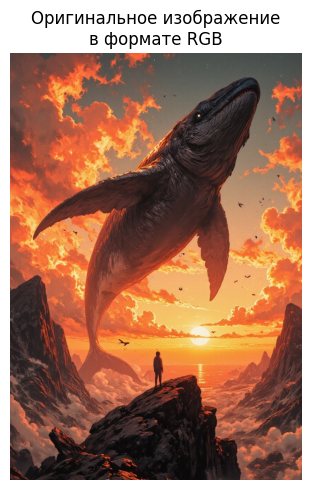

In [40]:
params = {
    "imglist": [img_cv2_orig],
    "subtitlelist": [
        "Оригинальное изображение\nв формате RGB"
    ],
    'figsize': (16, 5),
    'cols': 1,
    'rows': 1,
    'cmaps': [None],
    'colorbars': [False]
}

visualize = ImageVisualizer(params)
visualize.visualize()

## 2. Преобразование цветовых пространств:

### Преобразую изображение в Graycale | HSV

<span style="color: green;">Переиспользовал ранее определенную функцию chcolspace</span><br>

In [41]:
# Получаю изображение в пространстве Grayscale
img_cv2_gray = chcolspace(img_cv2_orig, lib="cv2", color_space="GRAY", save_path="./cv_homework_1")

In [42]:
# Получаю изображение в пространстве HSV
img_cv2_hsv = chcolspace(img_cv2_orig, lib="cv2", color_space="HSV", save_path="./cv_homework_1")

### Визуализирую изображение в Grayscale и HSV

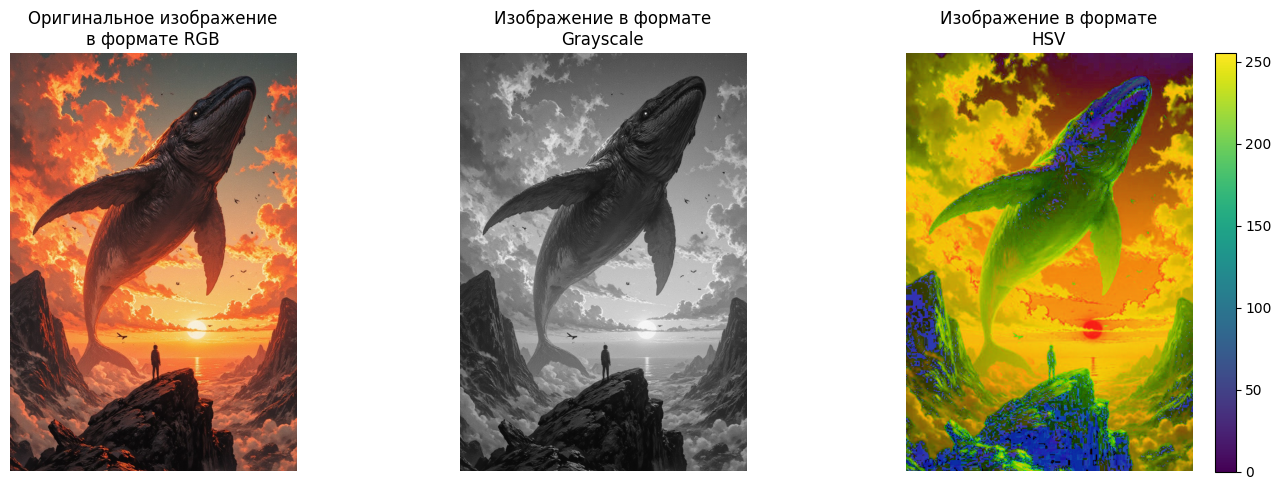

In [43]:
params = {
    "imglist": [img_cv2_orig, img_cv2_gray, img_cv2_hsv],
    "subtitlelist": [
        "Оригинальное изображение\nв формате RGB",
        "Изображение в формате\nGrayscale",
        "Изображение в формате\nHSV"
    ],
    'figsize': (14, 5),
    'cols': 3,
    'rows': 1,
    'cmaps': [None, 'gray', None],
    'colorbars': [False, False, True]
}

visualize = ImageVisualizer(params)
visualize.visualize()

### Строю гистограммы для изображений в формате Оригинальное | Grayscale | HSV

<span style="color: green;">Переиспользовал ранее определенную функцию hist</span><br>

In [44]:
# Гистограмма для оригинального изображения в пространстве RGB
hist_orig = hist(img_cv2_orig, lib="cv2", color_space="RGB", save_path="./cv_homework_1")
hist_orig = imgop("./cv_homework_1/histogram_RGB_cv2.png", lib="cv2", grayscale=False)

In [45]:
# Гистограмма для серого изображения в пространстве Gray
hist_gray = hist(img_cv2_gray, lib="cv2", color_space="GRAY", save_path="./cv_homework_1")
hist_gray = imgop("./cv_homework_1/histogram_GRAY_cv2.png", lib="cv2", grayscale=False)

In [46]:
# Гистограмма для HSV изображения в пространстве HSV
hist_hsv = hist(img_cv2_hsv, lib="cv2", color_space="HSV", save_path="./cv_homework_1")
hist_hsv = imgop("./cv_homework_1/histogram_HSV_cv2.png", lib="cv2", grayscale=False)

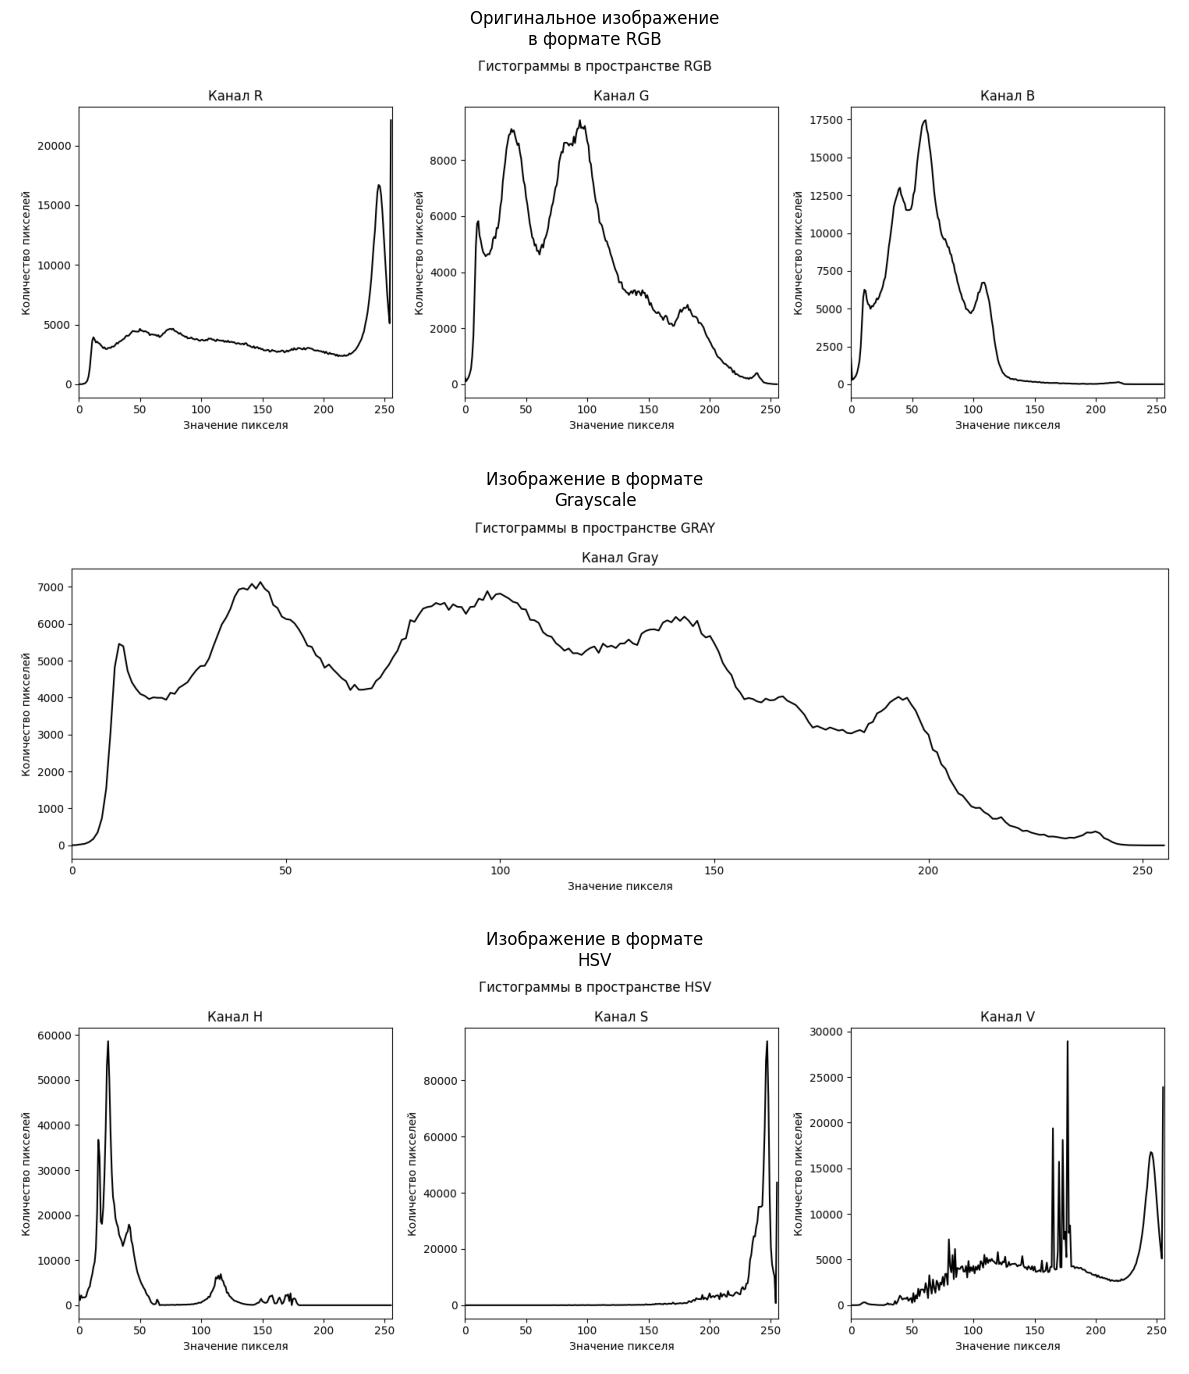

In [47]:
params = {
    "imglist": [hist_orig, hist_gray, hist_hsv],
    "subtitlelist": [
        "Оригинальное изображение\nв формате RGB",
        "Изображение в формате\nGrayscale",
        "Изображение в формате\nHSV"
    ],
    'figsize': (12, 14),
    'cols': 1,
    'rows': 3,
    'cmaps': [None, None, None],
    'colorbars': [False, False, False]
}

visualize = ImageVisualizer(params)
visualize.visualize()

## 3. Фильтрация изображений:

### Применяю к серому изображению Гауссово сглаживание с разными $σ$ с фиксированным ядром

<span style="color: green;">Переиспользовал ранее определенную функцию applyfilterplus</span><br>

In [48]:
_, filtered_gaussian_1, (p_1, s_1) = applyfilterplus(img_cv2_gray, lib="cv2", method="Gaussian", gaussian_kernel_size=61, gaussian_sigma=5.0)
_, filtered_gaussian_2, (p_2, s_2) = applyfilterplus(img_cv2_gray, lib="cv2", method="Gaussian", gaussian_kernel_size=61, gaussian_sigma=10.0)
_, filtered_gaussian_3, (p_3, s_3) = applyfilterplus(img_cv2_gray, lib="cv2", method="Gaussian", gaussian_kernel_size=61, gaussian_sigma=15.0)

### Визуализирую полученные изображения после применения Гауссово сглаживания

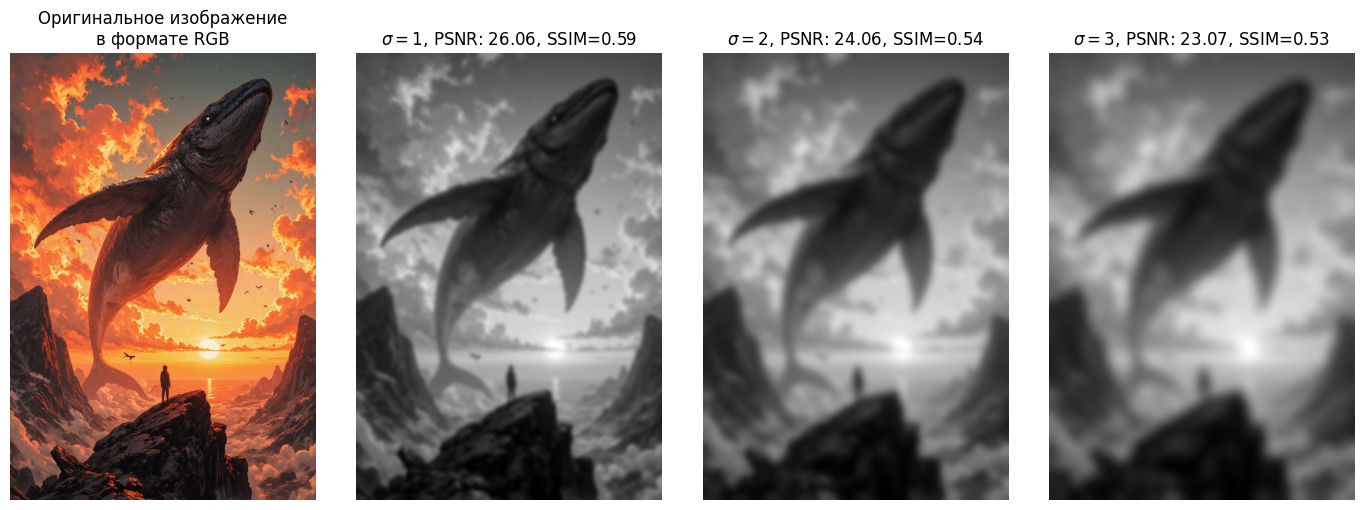

In [49]:
params = {
    "imglist": [img_cv2_orig, filtered_gaussian_1, filtered_gaussian_2, filtered_gaussian_3],
    "subtitlelist": [
        "Оригинальное изображение\nв формате RGB",
        f"$σ=1$, PSNR: {p_1:.2f}, SSIM={s_1:.2f}",
        f"$σ=2$, PSNR: {p_2:.2f}, SSIM={s_2:.2f}",
        f"$σ=3$, PSNR: {p_3:.2f}, SSIM={s_3:.2f}",
    ],
    'figsize': (14, 5),
    'cols': 4,
    'rows': 1,
    'cmaps': [None, 'gray', 'gray', 'gray'],
    'colorbars': [False, False, False, False]
}

visualize = ImageVisualizer(params)
visualize.visualize()

### Применяю к серому изображению медианный фильтр с разными размерами ядра

In [50]:
_, filtered_median_1, (p_1, s_1) = applyfilterplus(img_cv2_gray, lib="cv2", method="Median", median_kernel_size=11)
_, filtered_median_2, (p_2, s_2) = applyfilterplus(img_cv2_gray, lib="cv2", method="Median", median_kernel_size=21)
_, filtered_median_3, (p_3, s_3) = applyfilterplus(img_cv2_gray, lib="cv2", method="Median", median_kernel_size=31)

### Визуализирую полученные изображения после применения медианного фильтра

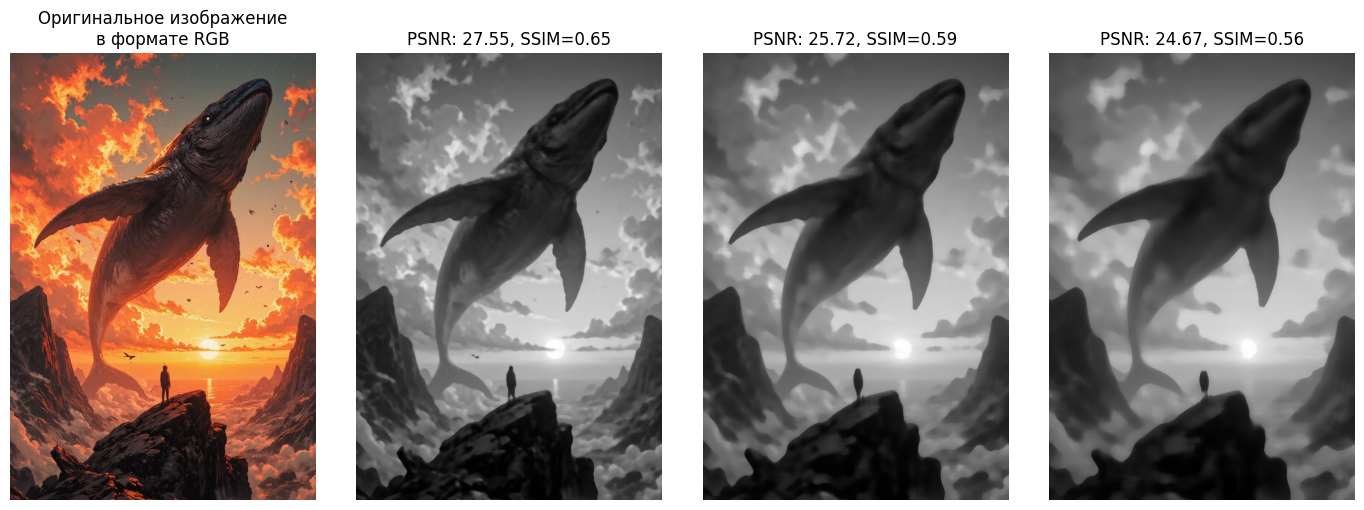

In [51]:
params = {
    "imglist": [img_cv2_orig, filtered_median_1, filtered_median_2, filtered_median_3],
    "subtitlelist": [
        "Оригинальное изображение\nв формате RGB",
        f"PSNR: {p_1:.2f}, SSIM={s_1:.2f}",
        f"PSNR: {p_2:.2f}, SSIM={s_2:.2f}",
        f"PSNR: {p_3:.2f}, SSIM={s_3:.2f}",
    ],
    'figsize': (14, 5),
    'cols': 4,
    'rows': 1,
    'cmaps': [None, 'gray', 'gray', 'gray'],
    'colorbars': [False, False, False, False]
}

visualize = ImageVisualizer(params)
visualize.visualize()

### Применяю фильтр Лапласса для повышения резкости

In [68]:
_, filtered_laplacian_1, (p_1, s_1) = applyfilterplus(img_cv2_gray, lib="cv2", method="Laplacian", laplacian_alpha=3.0)
_, filtered_laplacian_2, (p_2, s_2) = applyfilterplus(img_cv2_gray, lib="cv2", method="Laplacian", laplacian_alpha=4.0)
_, filtered_laplacian_3, (p_3, s_3) = applyfilterplus(img_cv2_gray, lib="cv2", method="Laplacian", laplacian_alpha=6.0)

### Визуализирую полученные изображения после применения фильтра Лапласса

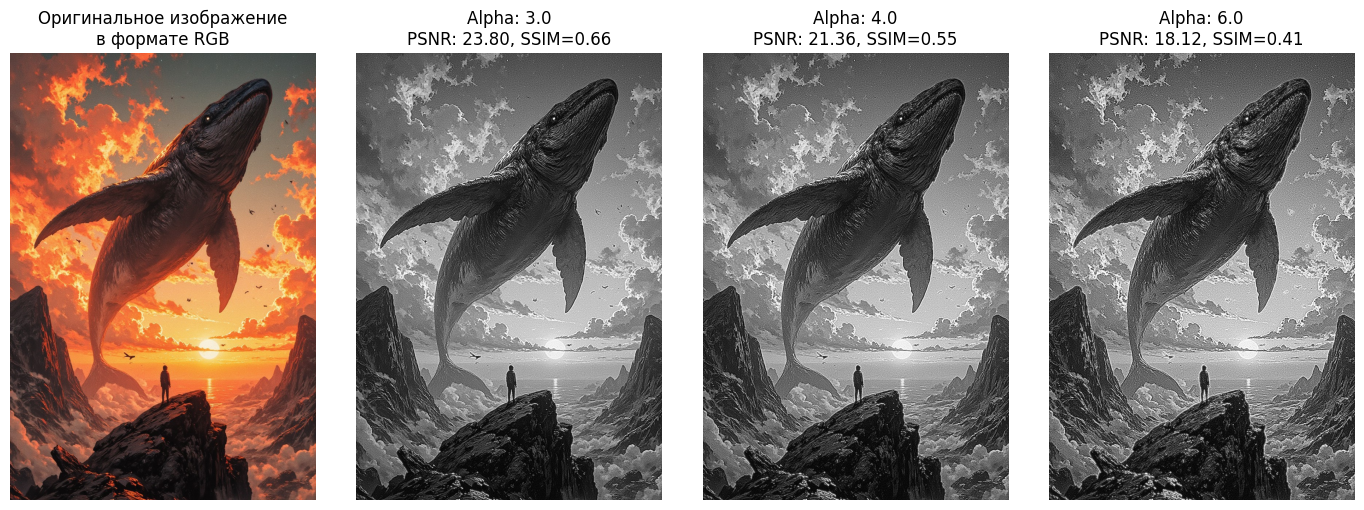

In [72]:
params = {
    "imglist": [img_cv2_orig, filtered_laplacian_1, filtered_laplacian_2, filtered_laplacian_3],
    "subtitlelist": [
        "Оригинальное изображение\nв формате RGB",
        f"Alpha: {3.0}\nPSNR: {p_1:.2f}, SSIM={s_1:.2f}",
        f"Alpha: {4.0}\nPSNR: {p_2:.2f}, SSIM={s_2:.2f}",
        f"Alpha: {6.0}\nPSNR: {p_3:.2f}, SSIM={s_3:.2f}",
    ],
    'figsize': (14, 5),
    'cols': 4,
    'rows': 1,
    'cmaps': [None, 'gray', 'gray', 'gray'],
    'colorbars': [False, False, False, False]
}

visualize = ImageVisualizer(params)
visualize.visualize()

## 4. Выделение краев и углов:

### Функция для выделения краев и углов

In [54]:
def imganal(
    img: Union[np.ndarray, Image.Image],
    lib: str = "cv2",
    canny_threshold1: int = 100,
    canny_threshold2: int = 200,
    harris_block_size: int = 2,
    harris_k_size: int = 3,
    harris_k: float = 0.2,
    corner_threshold: float = 0.03
) -> tuple:
    
    liblist = ["cv2", "PIL"]
    assert lib in liblist, f"Invalid lib: {lib}. Available: {liblist}"

    # Конвертация в grayscale
    if lib == "cv2":
        if not isinstance(img, np.ndarray):
            raise ValueError("Expected OpenCV image (numpy.ndarray)")
        if len(img.shape) == 3:
            gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        else:
            gray = img.copy()
    else:
        if not isinstance(img, Image.Image):
            raise ValueError("Expected PIL Image")
        if img.mode != 'L':
            img = img.convert("L")
        gray = np.array(img, dtype=np.uint8)

    # Сохраняем оригинал для визуализации
    if lib == "cv2":
        original = cv2.cvtColor(gray, cv2.COLOR_GRAY2BGR) if len(img.shape)==3 else img.copy()
    else:
        original = np.array(img.convert("RGB")) if img.mode != 'RGB' else np.array(img)

    # Оператор Собеля
    sobel_x = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=3)
    sobel_y = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize=3)
    
    # Нормализация градиентов
    sobel_x = cv2.normalize(sobel_x, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    sobel_y = cv2.normalize(sobel_y, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U)
    
    # Алгоритм Кэнни
    edges = cv2.Canny(gray, canny_threshold1, canny_threshold2)
    
    # Детектор углов Харриса
    corners = cv2.cornerHarris(gray, harris_block_size, harris_k_size, harris_k)
    
    # Визуализация результатов
    combined = original.copy()
    
    # Наложение краев Кэнни (красный)
    if lib == "cv2":
        combined[edges > 0] = [0, 255, 0]
    else:
        combined[edges > 0] = [0, 255, 0]  # Для RGB формата
    
    # Наложение углов Харриса (зеленый)
    corners_vis = corners > corner_threshold * corners.max()
    if lib == "cv2":
        combined[corners_vis] = [255, 0, 0]
    else:
        combined[corners_vis] = [255, 0, 0]
    
    return sobel_x, sobel_y, edges, corners, combined

In [55]:
sx, sy, edges, corners, result = imganal(img_cv2_orig, lib="cv2")

### Визуализация

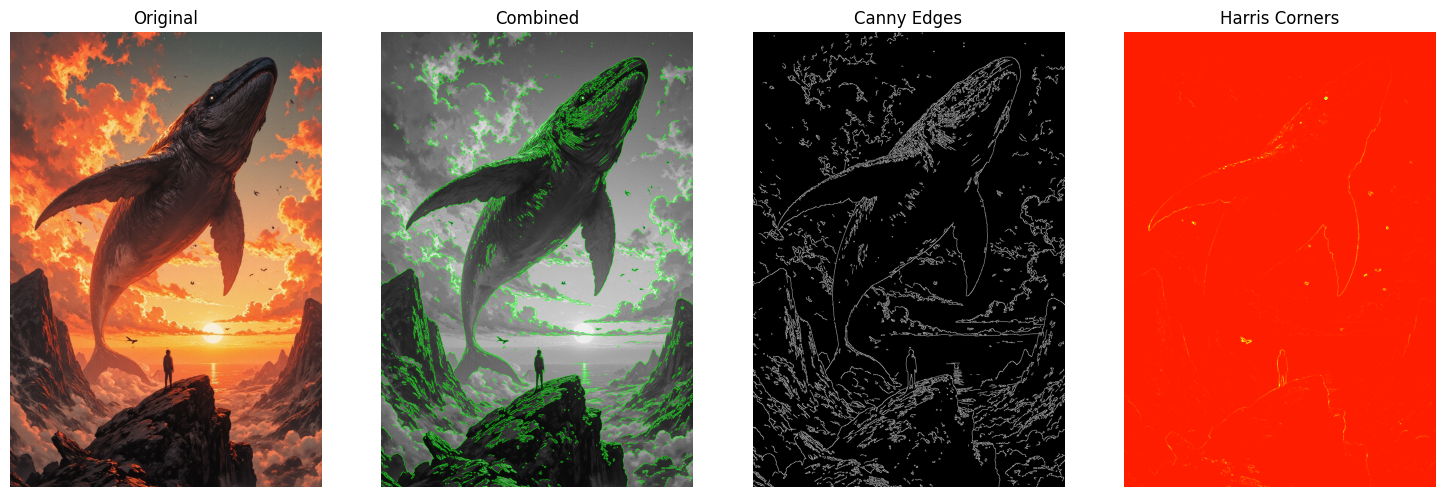

In [56]:
# Визуализация
params = {
    "lib": "cv2",
    'imglist': [img_cv2_orig, result, edges, corners],
    'subtitlelist': ["Original", "Combined", "Canny Edges", "Harris Corners"],
    'figsize': (15, 5),
    'cols': 4,
    'cmaps': [None, None, "gray", "jet"]
}

visualizer = ImageVisualizer(params)
visualizer.visualize()

## 5. Морфологические операции:

### Апргрейд функции для пороговой сегментации + мофрологических операций

In [57]:
def thresmorphplus(
    img: Union[np.ndarray, Image.Image],
    lib: str = "cv2",
    threshold_method: str = "adaptive",
    morph_operation: str = "erosion",
    kernel_shape: str = "rect",
    kernel_size: int = 3,
    iterations: int = 1,
    adaptive_block: int = 11,
    adaptive_c: int = 2
) -> tuple:
    
    liblist = ["cv2", "PIL"]
    assert lib in liblist, f"Некорректная библиотека: {lib}. Допустимо: {liblist}"
    
    # Конвертация в grayscale
    if lib == "PIL":
        if not isinstance(img, Image.Image):
            raise ValueError("Ожидается изображение PIL")
        img = np.array(img.convert("L"))
    else:
        if len(img.shape) == 3:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Бинаризация
    if threshold_method == "adaptive":
        binary = cv2.adaptiveThreshold(
            img, 255, 
            cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
            cv2.THRESH_BINARY_INV, 
            adaptive_block, adaptive_c
        )
    else:  # Otsu
        _, binary = cv2.threshold(
            img, 0, 255, 
            cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU
        )

    # Создание структурного элемента
    kernel_types = {
        "rect": cv2.MORPH_RECT,
        "ellipse": cv2.MORPH_ELLIPSE,
        "cross": cv2.MORPH_CROSS
    }
    kernel = cv2.getStructuringElement(
        kernel_types[kernel_shape],
        (kernel_size, kernel_size)
    )

    # Применение морфологической операции
    if morph_operation == "open":
        morph_result = cv2.morphologyEx(binary, cv2.MORPH_OPEN, kernel, iterations=iterations)
    elif morph_operation == "close":
        morph_result = cv2.morphologyEx(binary, cv2.MORPH_CLOSE, kernel, iterations=iterations)
    elif morph_operation == "erosion":
        morph_result = cv2.erode(binary, kernel, iterations=iterations)
    elif morph_operation == "dilation":
        morph_result = cv2.dilate(binary, kernel, iterations=iterations)
    else:
        raise ValueError(f"Неподдерживаемая операция: {morph_operation}")

    # Расчет метрик
    metrics = (psnr(binary, morph_result), ssim(binary, morph_result))
    
    return img, binary, morph_result, metrics

### Визуализация

In [58]:
original, binary, result, (p, s) = thresmorphplus(
    img_cv2_orig,
    threshold_method="otsu",
    morph_operation="erosion",
    kernel_shape="ellipse",
    kernel_size=5,
    iterations=2
)

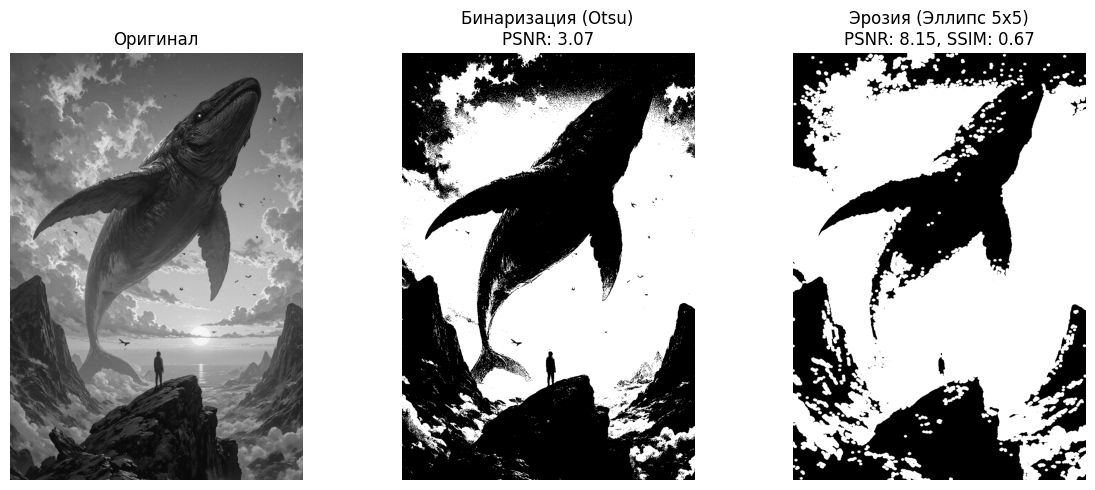

In [59]:
# Визуализация
params = {
    "lib": "cv2",
    "imglist": [original, binary, result],
    "subtitlelist": [
        "Оригинал", 
        f"Бинаризация (Otsu)\nPSNR: {psnr(original, binary):.2f}", 
        f"Эрозия (Эллипс 5x5)\nPSNR: {p:.2f}, SSIM: {s:.2f}"
    ],
    "figsize": (12, 5),
    "cols": 3,
    "cmaps": ["gray", "binary", "binary"]
}

visualizer = ImageVisualizer(params)
visualizer.visualize()

In [60]:
original, binary, result, (p, s) = thresmorphplus(
    img_cv2_orig,
    threshold_method="otsu",
    morph_operation="dilation",
    kernel_shape="ellipse",
    kernel_size=5,
    iterations=2
)

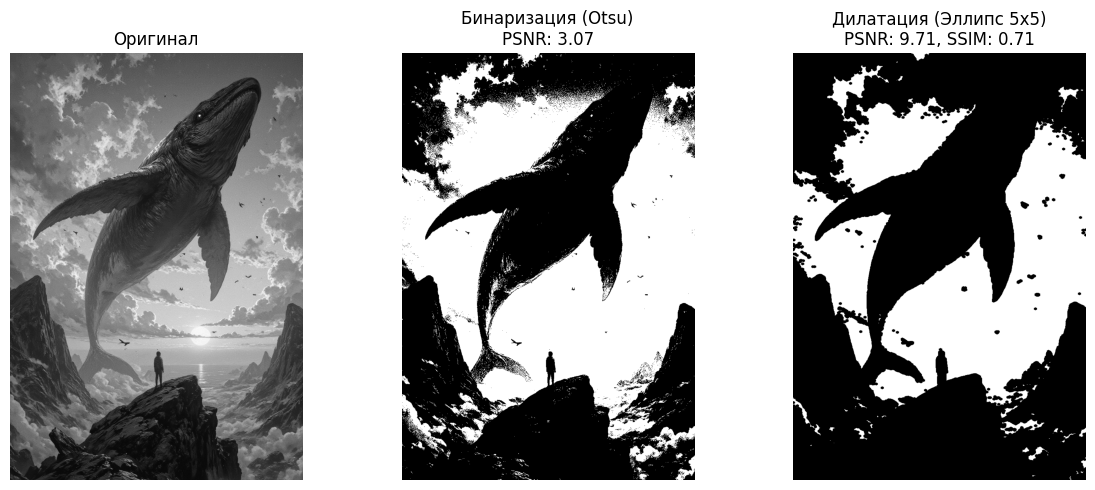

In [61]:
# Визуализация
params = {
    "lib": "cv2",
    "imglist": [original, binary, result],
    "subtitlelist": [
        "Оригинал", 
        f"Бинаризация (Otsu)\nPSNR: {psnr(original, binary):.2f}", 
        f"Дилатация (Эллипс 5x5)\nPSNR: {p:.2f}, SSIM: {s:.2f}"
    ],
    "figsize": (12, 5),
    "cols": 3,
    "cmaps": ["gray", "binary", "binary"]
}

visualizer = ImageVisualizer(params)
visualizer.visualize()

In [62]:
original, binary, result, (p, s) = thresmorphplus(
    img_cv2_orig,
    threshold_method="otsu",
    morph_operation="open",
    kernel_shape="ellipse",
    kernel_size=5,
    iterations=2
)

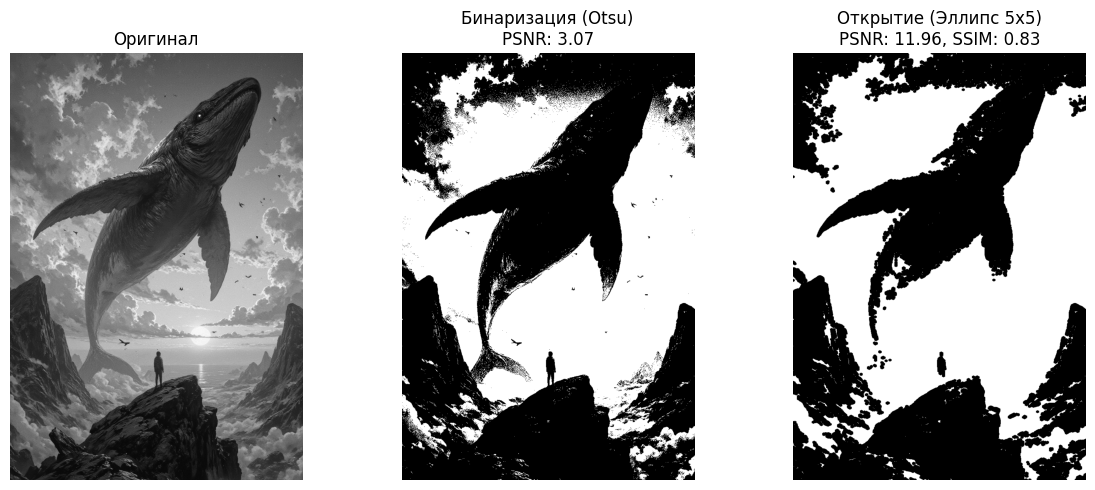

In [63]:
# Визуализация
params = {
    "lib": "cv2",
    "imglist": [original, binary, result],
    "subtitlelist": [
        "Оригинал", 
        f"Бинаризация (Otsu)\nPSNR: {psnr(original, binary):.2f}", 
        f"Открытие (Эллипс 5x5)\nPSNR: {p:.2f}, SSIM: {s:.2f}"
    ],
    "figsize": (12, 5),
    "cols": 3,
    "cmaps": ["gray", "binary", "binary"]
}

visualizer = ImageVisualizer(params)
visualizer.visualize()

In [64]:
original, binary, result, (p, s) = thresmorphplus(
    img_cv2_orig,
    threshold_method="otsu",
    morph_operation="close",
    kernel_shape="ellipse",
    kernel_size=5,
    iterations=2
)

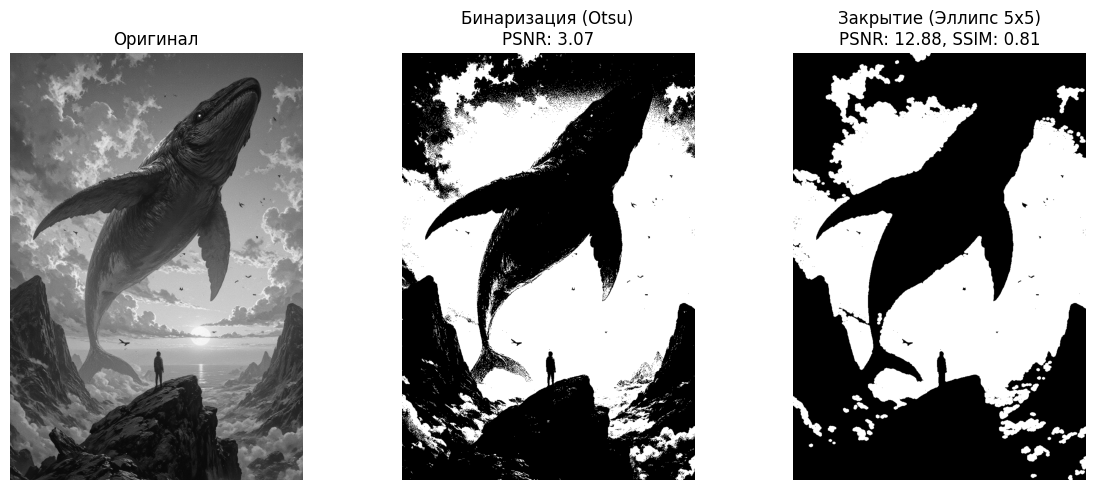

In [65]:
# Визуализация
params = {
    "lib": "cv2",
    "imglist": [original, binary, result],
    "subtitlelist": [
        "Оригинал", 
        f"Бинаризация (Otsu)\nPSNR: {psnr(original, binary):.2f}", 
        f"Закрытие (Эллипс 5x5)\nPSNR: {p:.2f}, SSIM: {s:.2f}"
    ],
    "figsize": (12, 5),
    "cols": 3,
    "cmaps": ["gray", "binary", "binary"]
}

visualizer = ImageVisualizer(params)
visualizer.visualize()

### Обьяснение

Объяснение операций:

1. Эрозия: </br>
    Уменьшает белые области, удаляет мелкие объекты </br>
    Полезно для разделения слипшихся объектов </br>

2. Дилатация: </br>
    Увеличивает белые области, заполняет пробелы </br>
    Используется для восстановления формы объектов </br>

3. Открытие (эрозия + дилатация): </br>
    Удаляет шум и мелкие объекты, сохраняя основную форму </br>
    Эффект: "очистка" фона </br>

4. Закрытие (дилатация + эрозия): </br>
    Заполняет внутренние пробелы в объектах </br>
    Соединяет близко расположенные объекты </br>

# Выводы

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">

<pre style="background-color: #888888; padding: 10px; border-radius: 5px; font-family: monospace;">
    <span style="color: white;">
        Полезные инструменты пред и постобработки данных
    </span>
</pre>

<hr style="border: 1px solid rgba(50, 50, 255, 0.5); width: 100%;">